In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler


import seaborn as sns

## **Data Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/Shareddrives/ML_Project/kickstarter_data_full.csv')
print(data.shape)
data.head()

(20632, 68)


<ipython-input-3-a618e42e4195>:1: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/Shareddrives/ML_Project/kickstarter_data_full.csv')


,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


## **EDA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   20632 non-null  int64  
 1   id                           20632 non-null  int64  
 2   photo                        20632 non-null  object 
 3   name                         20632 non-null  object 
 4   blurb                        20627 non-null  object 
 5   goal                         20632 non-null  float64
 6   pledged                      20632 non-null  float64
 7   state                        20632 non-null  object 
 8   slug                         20632 non-null  object 
 9   disable_communication        20632 non-null  bool   
 10  country                      20632 non-null  object 
 11  currency                     20632 non-null  object 
 12  currency_symbol              20632 non-null  object 
 13  currency_trailin

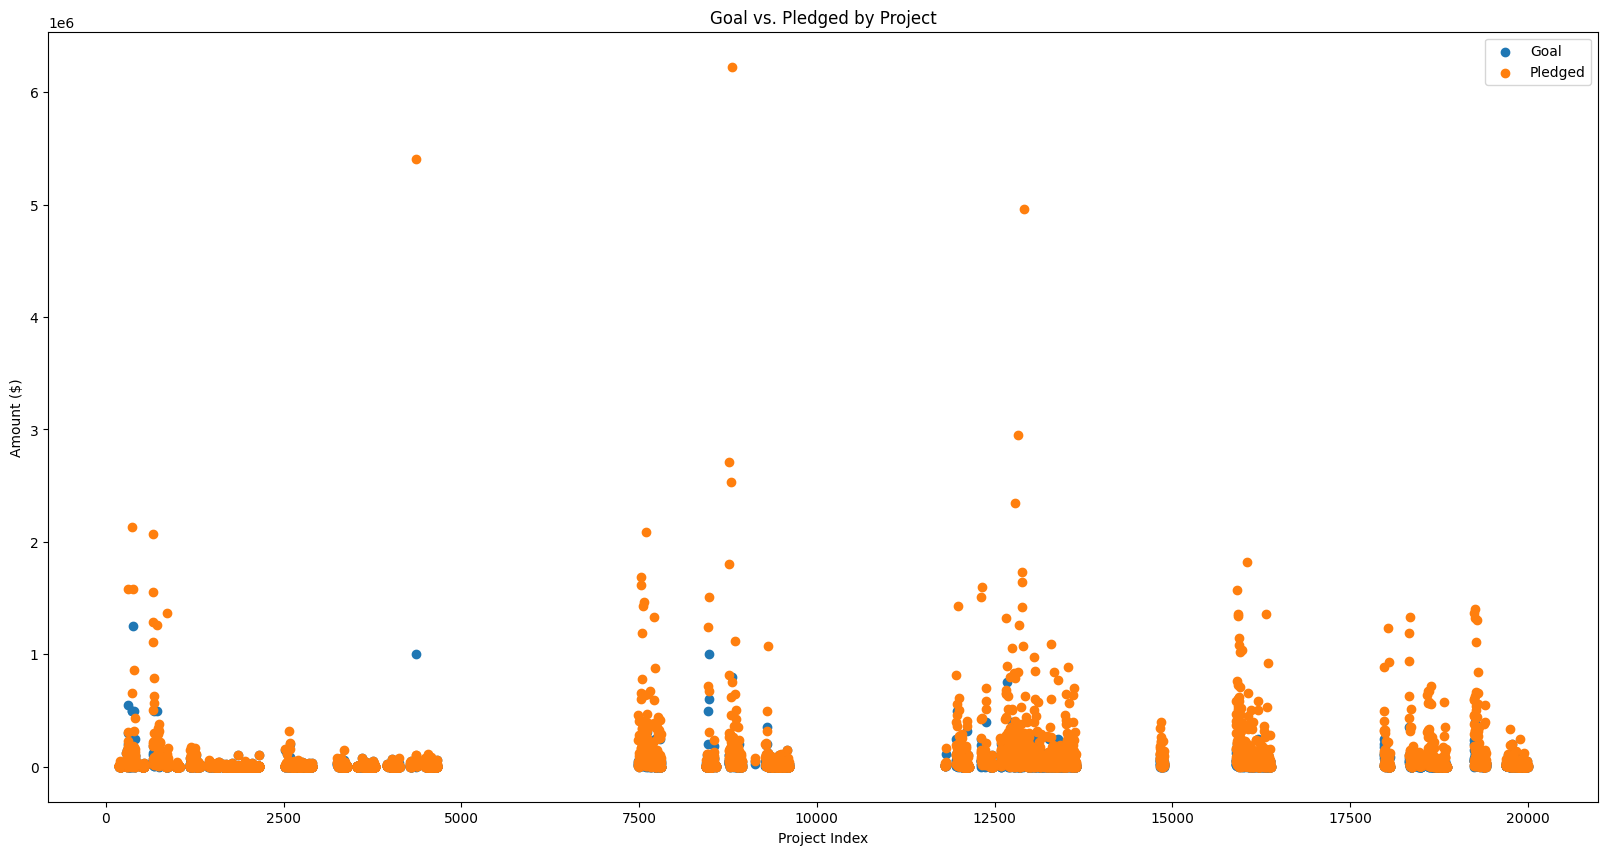

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = data[data['state'] == 'successful']

# Create the scatter plot
fig = plt.figure(figsize=(20, 10))
plt.scatter(df.index, df['goal'], label='Goal')
plt.scatter(df.index, df['pledged'], label='Pledged')
plt.title('Goal vs. Pledged by Project')
plt.xlabel('Project Index')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()



In [6]:
# list of columns to drop
# There is very less data for the above features so we decided to drop these columns

cols_to_drop = ['Unnamed: 0', 'friends', 'is_starred', 'is_backing', 
                'permissions']

# drop the columns
data = data.drop(cols_to_drop, axis=1)


In [7]:
columns = data.columns.tolist()

In [8]:
data.shape

(20632, 63)

In [9]:
data.isna().sum()

id                 0
photo              0
name               0
blurb              5
goal               0
                  ..
SuccessfulBool     0
USorGB             0
TOPCOUNTRY         0
LaunchedTuesday    0
DeadlineWeekend    0
Length: 63, dtype: int64

In [10]:
# get the list of integer columns
int_cols = data.select_dtypes(include=['int','float']).columns.tolist()

# fill missing values in integer columns with mean
for col in int_cols:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

In [11]:
# Replace missing values in categorical columns with mode
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [12]:
#Checking unique values in categorical columns
for col in data.columns:
  if(data[col].dtype=='object'):
       print(col, ':---', len(data[col].unique()), 'labels')

photo :--- 20632 labels
name :--- 20610 labels
blurb :--- 20458 labels
state :--- 5 labels
slug :--- 20632 labels
country :--- 21 labels
currency :--- 13 labels
currency_symbol :--- 5 labels
deadline :--- 20213 labels
state_changed_at :--- 20238 labels
created_at :--- 20483 labels
launched_at :--- 20448 labels
creator :--- 20522 labels
location :--- 5178 labels
category :--- 24 labels
profile :--- 20632 labels
urls :--- 20632 labels
source_url :--- 33 labels
deadline_weekday :--- 7 labels
state_changed_at_weekday :--- 7 labels
created_at_weekday :--- 7 labels
launched_at_weekday :--- 7 labels
create_to_launch :--- 20553 labels
launch_to_deadline :--- 4987 labels
launch_to_state_change :--- 7544 labels


In [13]:
print(data.isna().sum())

id                 0
photo              0
name               0
blurb              0
goal               0
                  ..
SuccessfulBool     0
USorGB             0
TOPCOUNTRY         0
LaunchedTuesday    0
DeadlineWeekend    0
Length: 63, dtype: int64


In [14]:
# Dropping the columns which have many unique values

data=data.drop(['photo','blurb','id','name','slug','creator','profile','urls','create_to_launch','location','launch_to_deadline','launch_to_state_change'],axis=1)

In [15]:
data=data.drop(['source_url','deadline_weekday','state_changed_at_weekday','created_at_weekday','launched_at_weekday','currency_symbol','deadline','created_at','state_changed_at','launched_at'],axis=1)

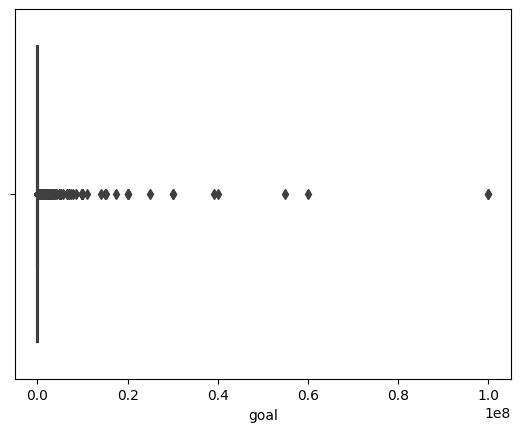

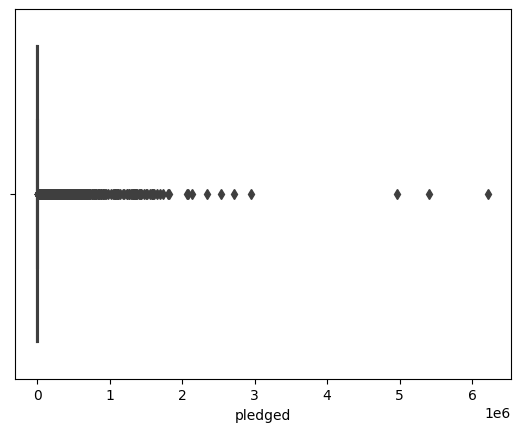

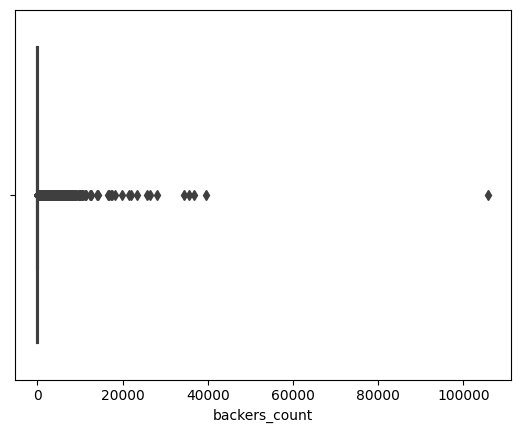

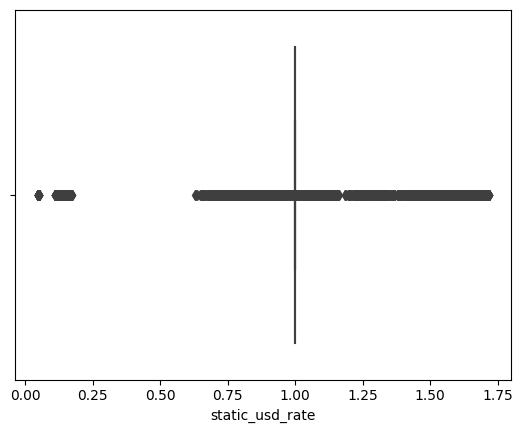

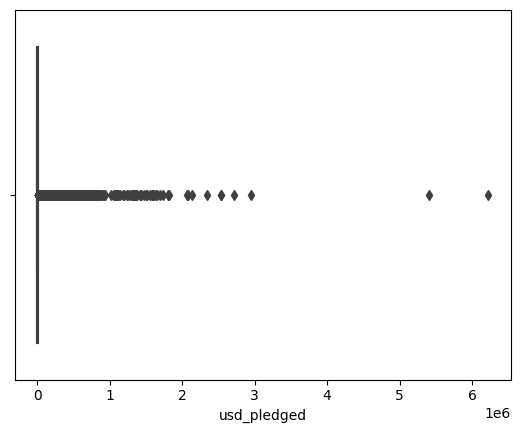

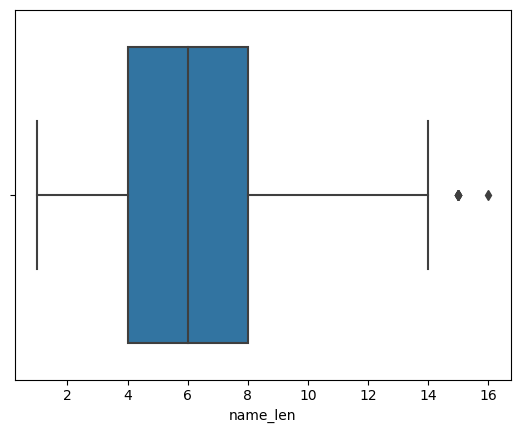

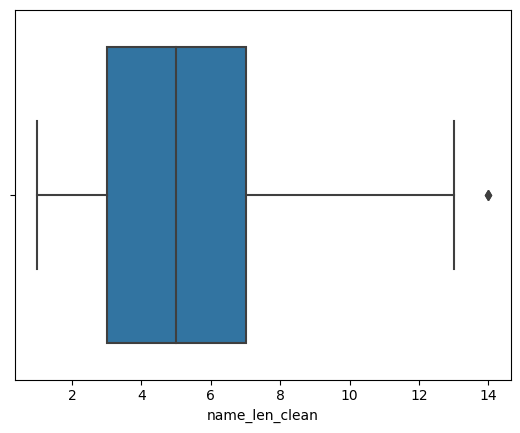

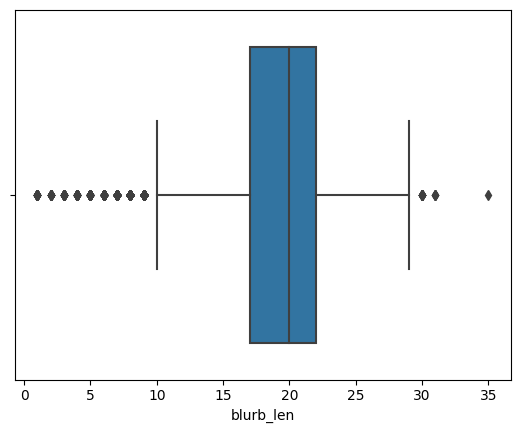

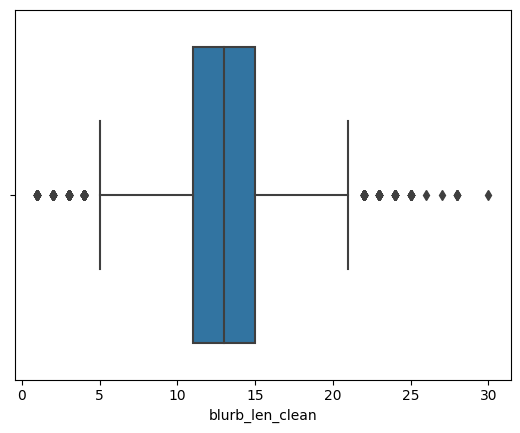

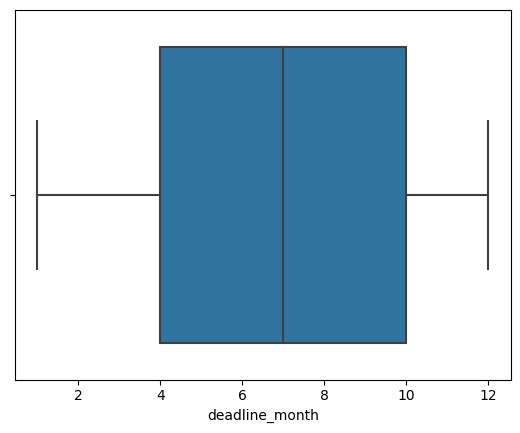

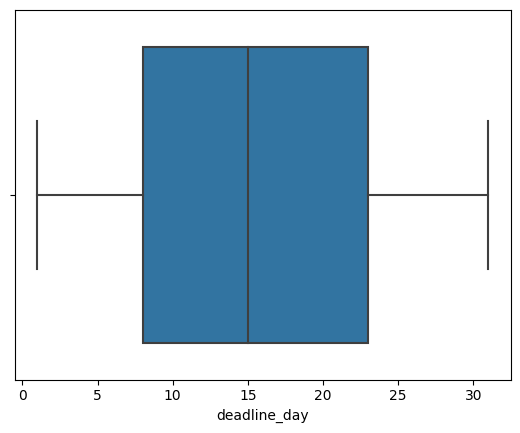

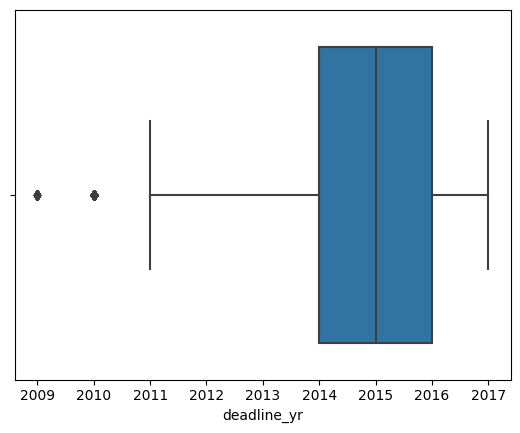

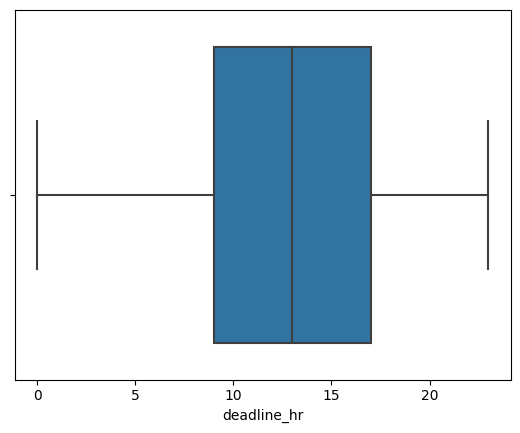

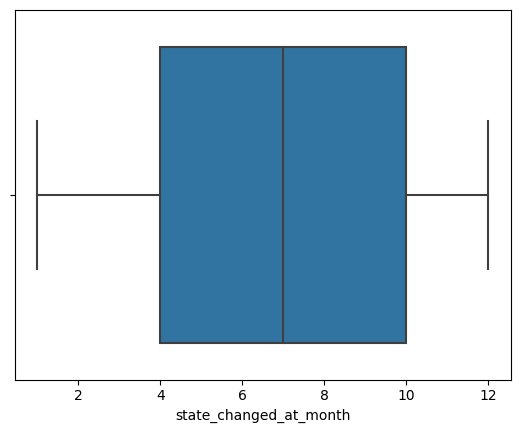

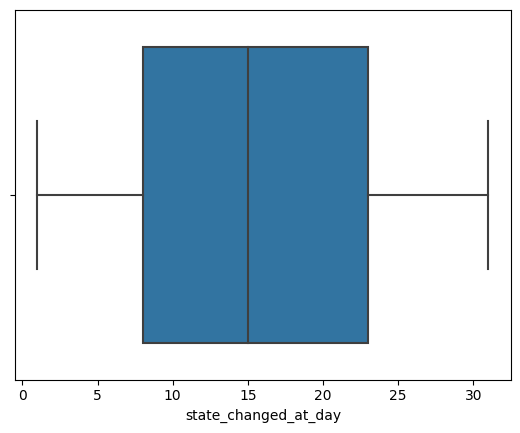

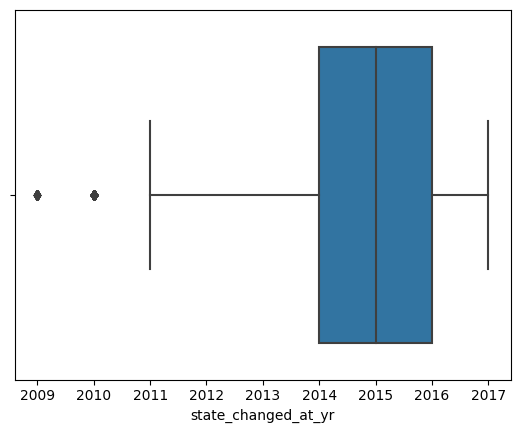

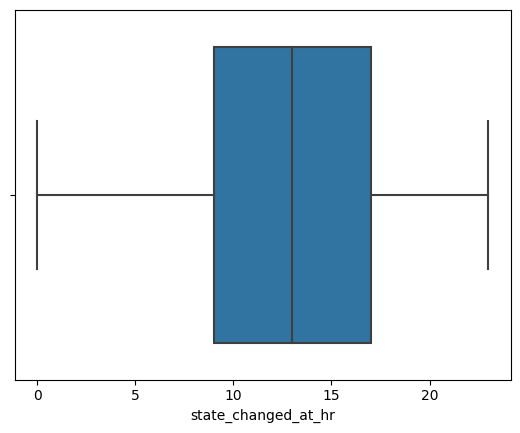

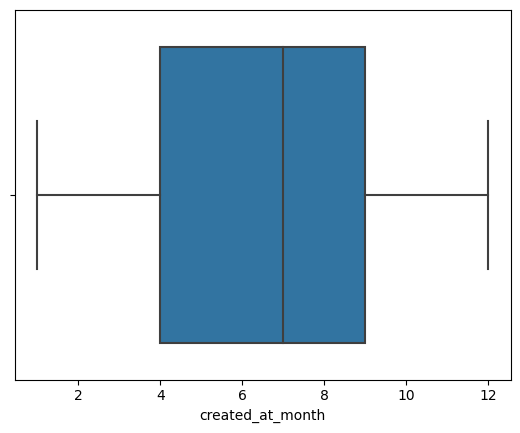

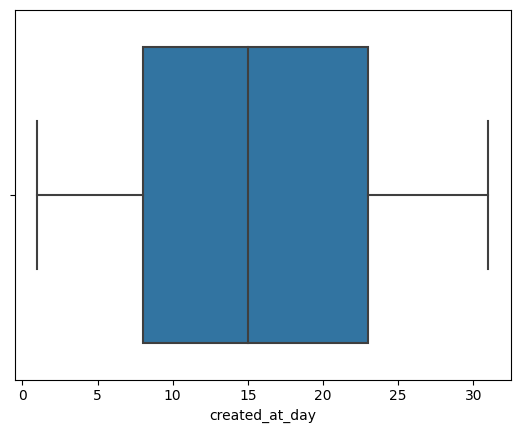

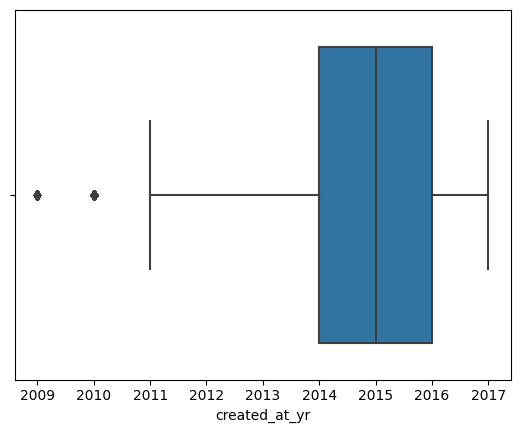

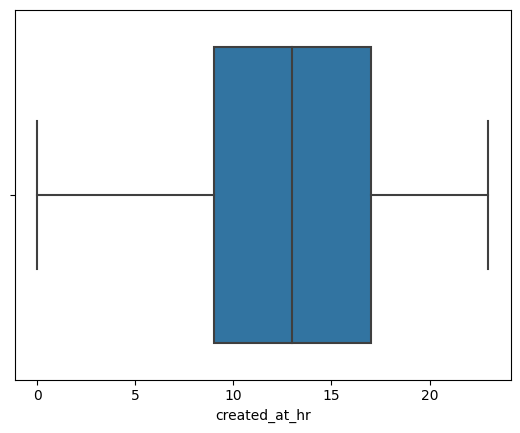

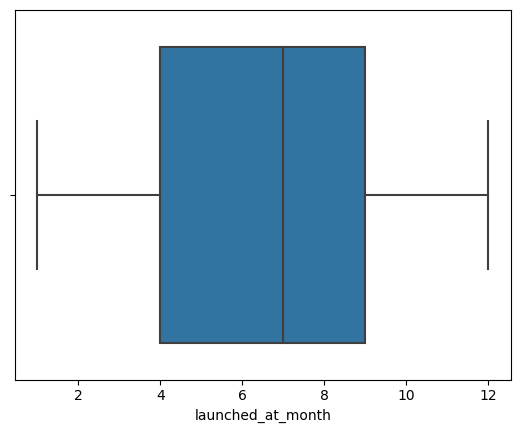

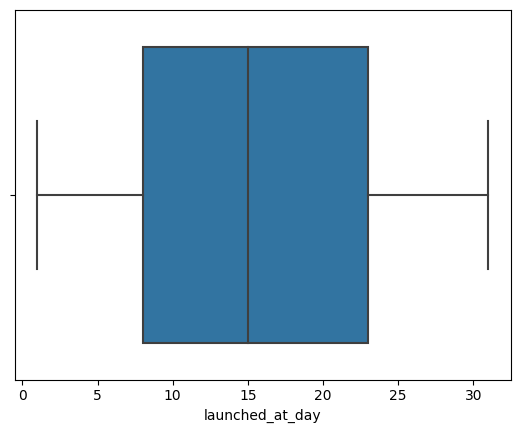

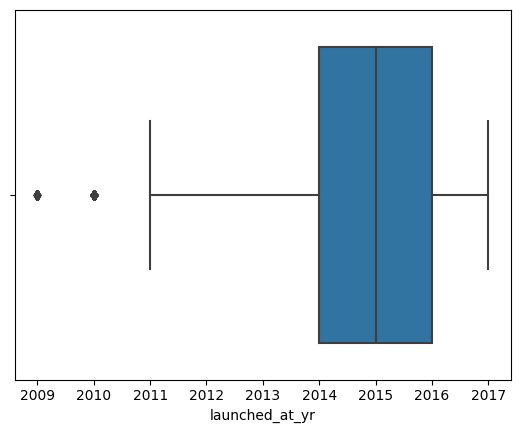

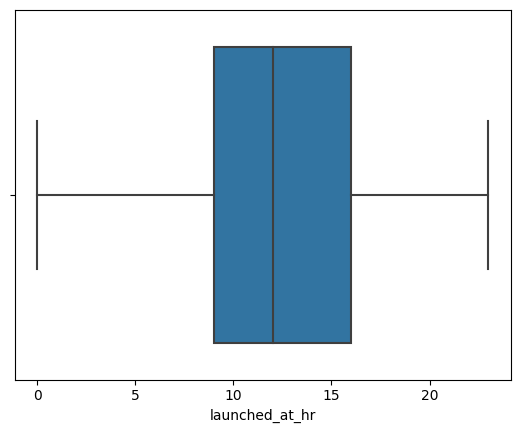

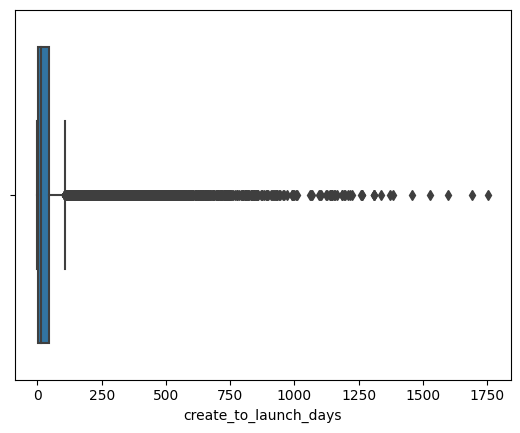

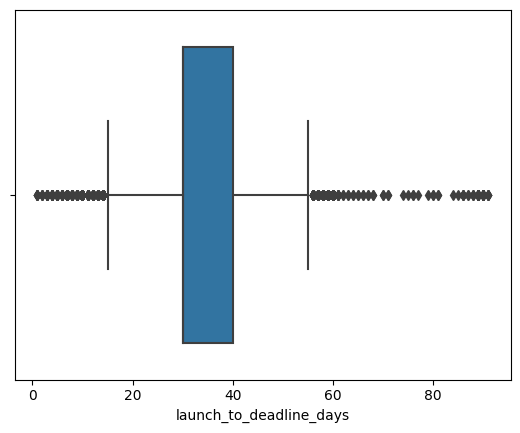

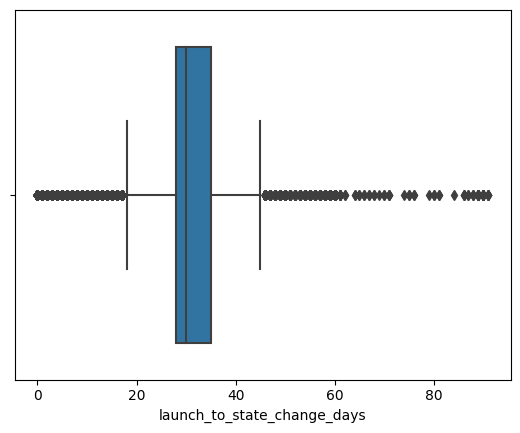

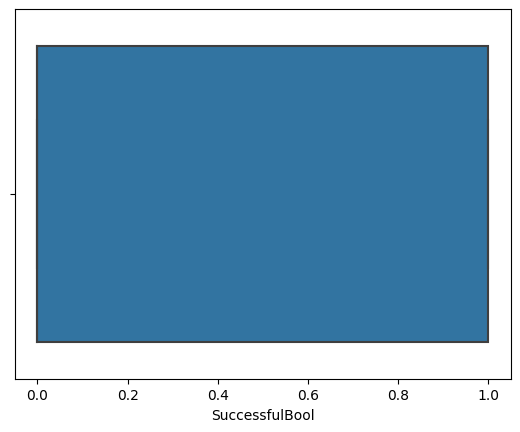

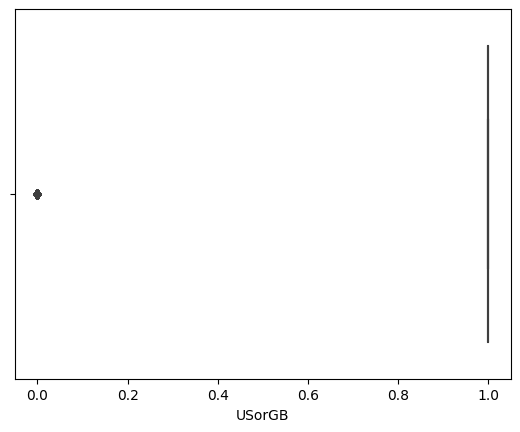

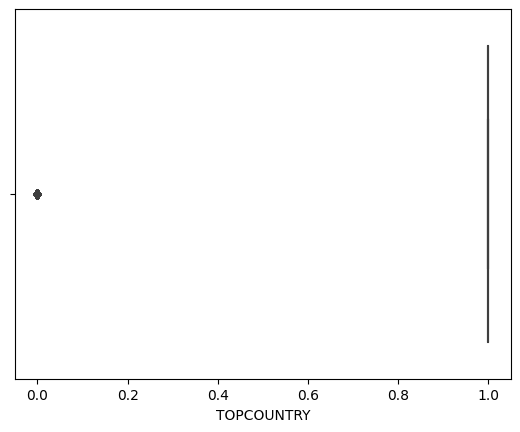

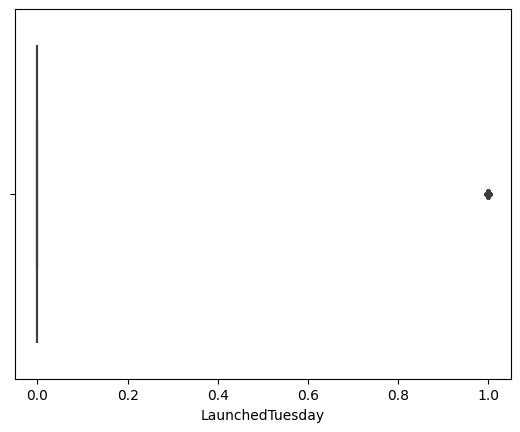

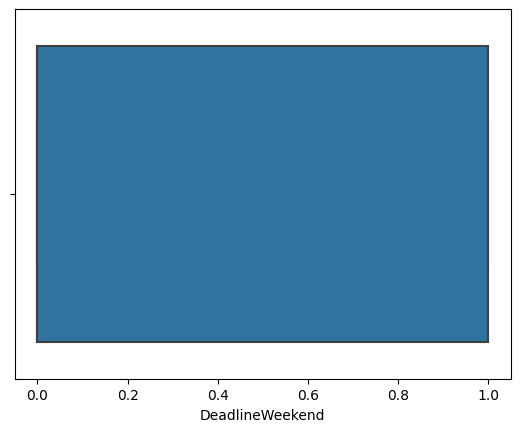

In [16]:
# Visualize outliers using boxplot after handling the outliers

numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Create a box plot for each column in the DataFrame
for column in numerical_cols:
    sns.boxplot(x=data[column])
    plt.show()

In [17]:
#handling the outliers
import numpy as np

def handle_outliers(df, cols, threshold=3):
    for col in cols:
        if np.issubdtype(df[col].dtype, np.number):
            z = np.abs((df[col] - df[col].mean()) / df[col].std())
            df[col][z > threshold] = df[col].median()
    return df



In [18]:
import warnings
warnings.filterwarnings('ignore')

data = handle_outliers(data, numerical_cols)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   goal                         20632 non-null  float64
 1   pledged                      20632 non-null  float64
 2   state                        20632 non-null  object 
 3   disable_communication        20632 non-null  bool   
 4   country                      20632 non-null  object 
 5   currency                     20632 non-null  object 
 6   currency_trailing_code       20632 non-null  bool   
 7   staff_pick                   20632 non-null  bool   
 8   backers_count                20632 non-null  int64  
 9   static_usd_rate              20632 non-null  float64
 10  usd_pledged                  20632 non-null  float64
 11  category                     20632 non-null  object 
 12  spotlight                    20632 non-null  bool   
 13  name_len        

In [20]:
for col in data.columns:
  if(data[col].dtype=='object'):
       print(col, ':---', len(data[col].unique()), 'labels')

state :--- 5 labels
country :--- 21 labels
currency :--- 13 labels
category :--- 24 labels


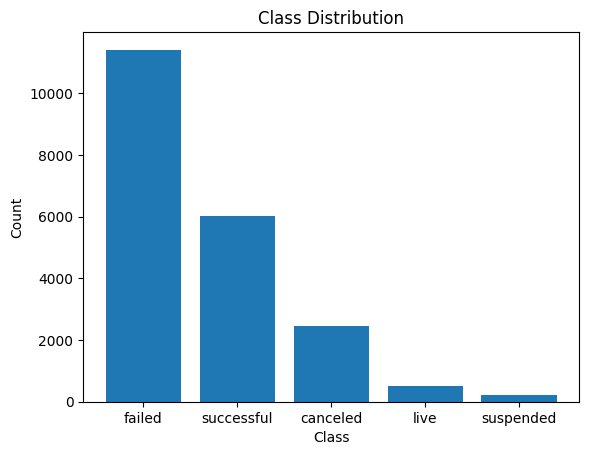

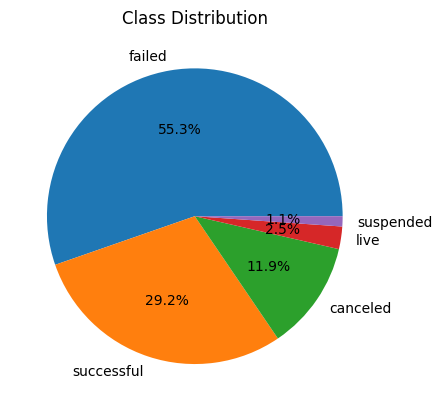

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of instances for each class
class_counts = data["state"].value_counts()

# Plot the class distribution using a bar plot
fig, ax = plt.subplots()
ax.bar(class_counts.index.astype(str), class_counts.values)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Distribution")
plt.show()

# Plot the class distribution using a pie chart
fig, ax = plt.subplots()
ax.pie(class_counts.values, labels=class_counts.index, autopct="%1.1f%%")
ax.set_title("Class Distribution")
plt.show()


In [22]:
# data_live = data[data["state"] == "live"]
# data_live.info()

In [23]:
# data= data[data["state"] != "live"]

In [24]:
data.shape

(20632, 41)

In [25]:
# Encoding state column 

# Define a dictionary to map each value to a specific value
value_map = {
    "successful":1,
    "failed": 0,
    "suspended":0,
    "canceled":0,
    "live":0
}

# Encode the values in the "label" column using the dictionary
data["state"] = data["state"].replace(value_map)

# Check the encoded values
print(data["state"].unique())


[0 1]


In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Specify the columns to be encoded
cols_to_encode = ["country","currency","category"]

# Initialize the Label Encoder
le = LabelEncoder()

# Apply Label Encoding to the columns
for col in cols_to_encode:
    data[col] = le.fit_transform(data[col])


In [27]:
X=data.drop(['state'],axis=1)
y=data["state"]

y=pd.DataFrame(y)


In [28]:
X_cols=X.columns.tolist()
y_cols=y.columns.tolist()

In [29]:
data=pd.concat([X,y],axis=1)

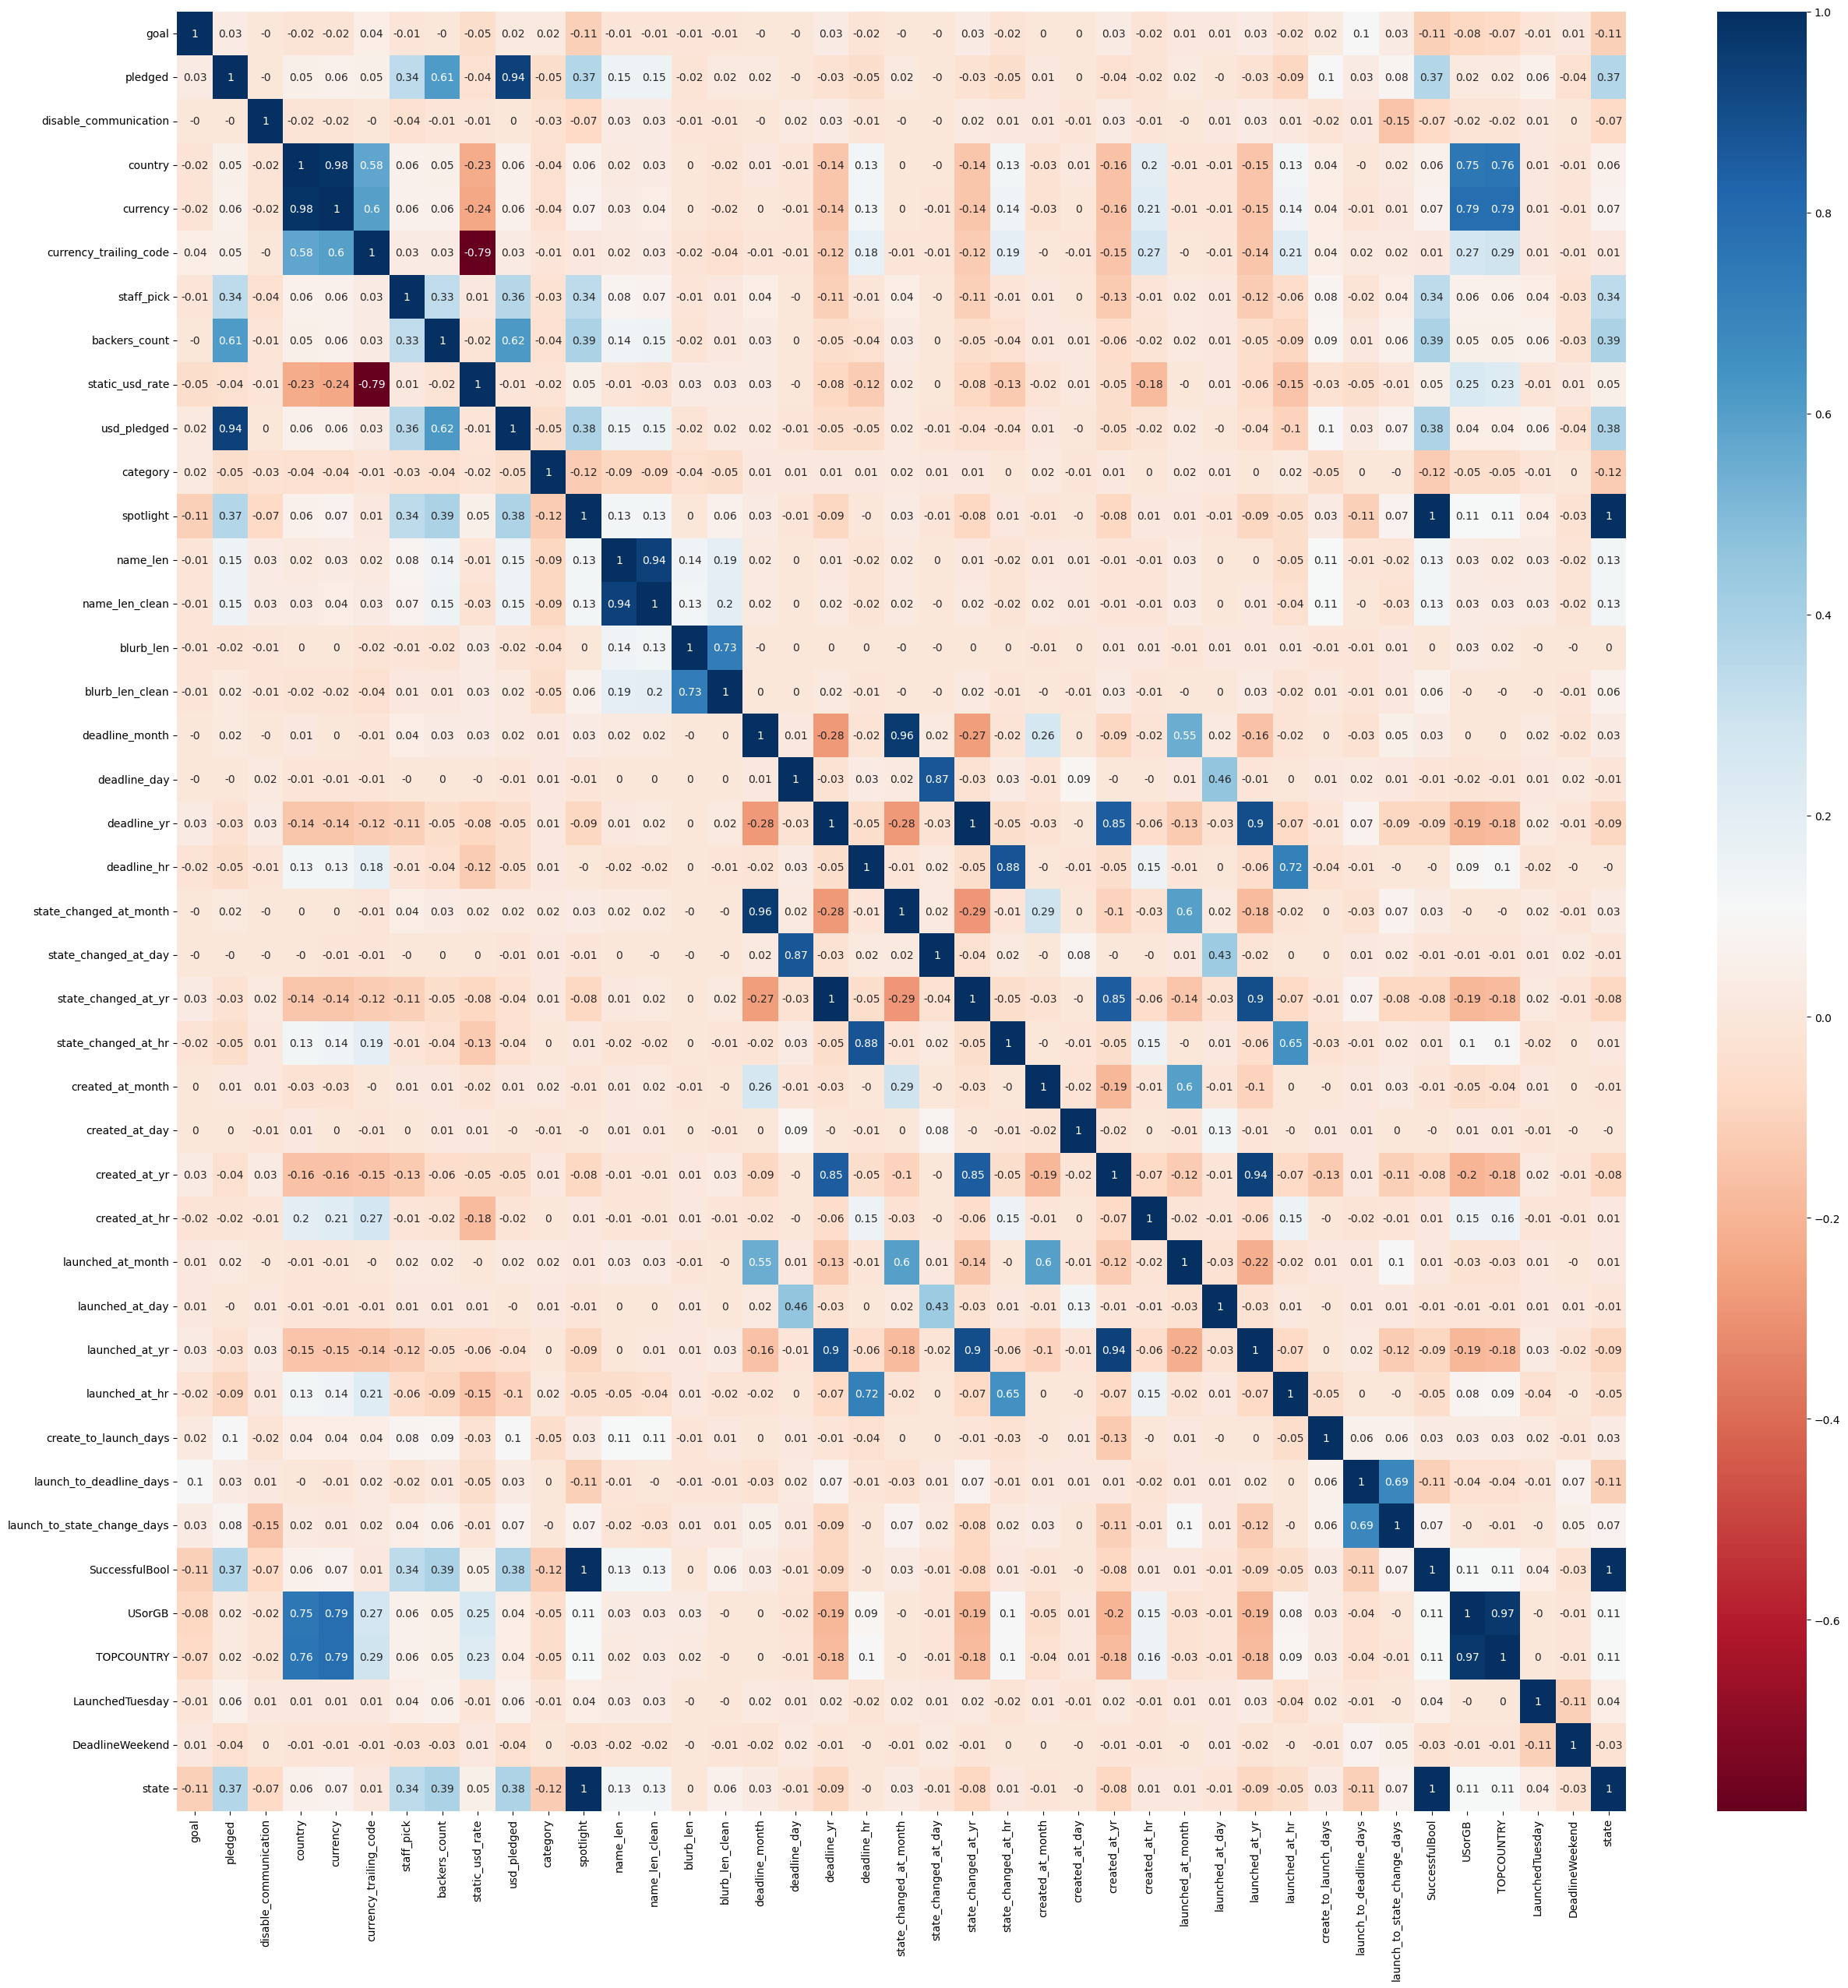

In [30]:

# calculate the correlation matrix
corr_matrix = data.corr().round(2)

# create the heatmap
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', ax=ax)

# show the plot
plt.show()

In [31]:
import pandas as pd

# Create a correlation matrix
corr_matrix = data.corr()

# Set the threshold for correlation coefficients
threshold = 0.7

# Find columns that have a correlation coefficient greater than the threshold
correlated_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_columns.add(colname)

# Convert the set of correlated columns to a list
correlated_columns = list(correlated_columns)

# Filter the original DataFrame to only include the non-correlated columns
non_correlated_data = data.drop(columns=correlated_columns)
non_correlated_data.shape
non_correlated_data.columns

Index(['goal', 'pledged', 'disable_communication', 'country',
       'currency_trailing_code', 'staff_pick', 'backers_count', 'category',
       'spotlight', 'name_len', 'blurb_len', 'deadline_month', 'deadline_day',
       'deadline_yr', 'deadline_hr', 'created_at_month', 'created_at_day',
       'created_at_hr', 'launched_at_month', 'launched_at_day',
       'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'LaunchedTuesday', 'DeadlineWeekend'],
      dtype='object')

In [32]:
data=pd.concat([non_correlated_data,y],axis=1)
data=data.drop(['spotlight'],axis=1)
data.shape

(20632, 25)

In [33]:
X=data.drop(["state"],axis=1)
y=data["state"]
y=pd.DataFrame(y)

In [34]:
X_cols=X.columns.tolist()
y_cols=y.columns.tolist()

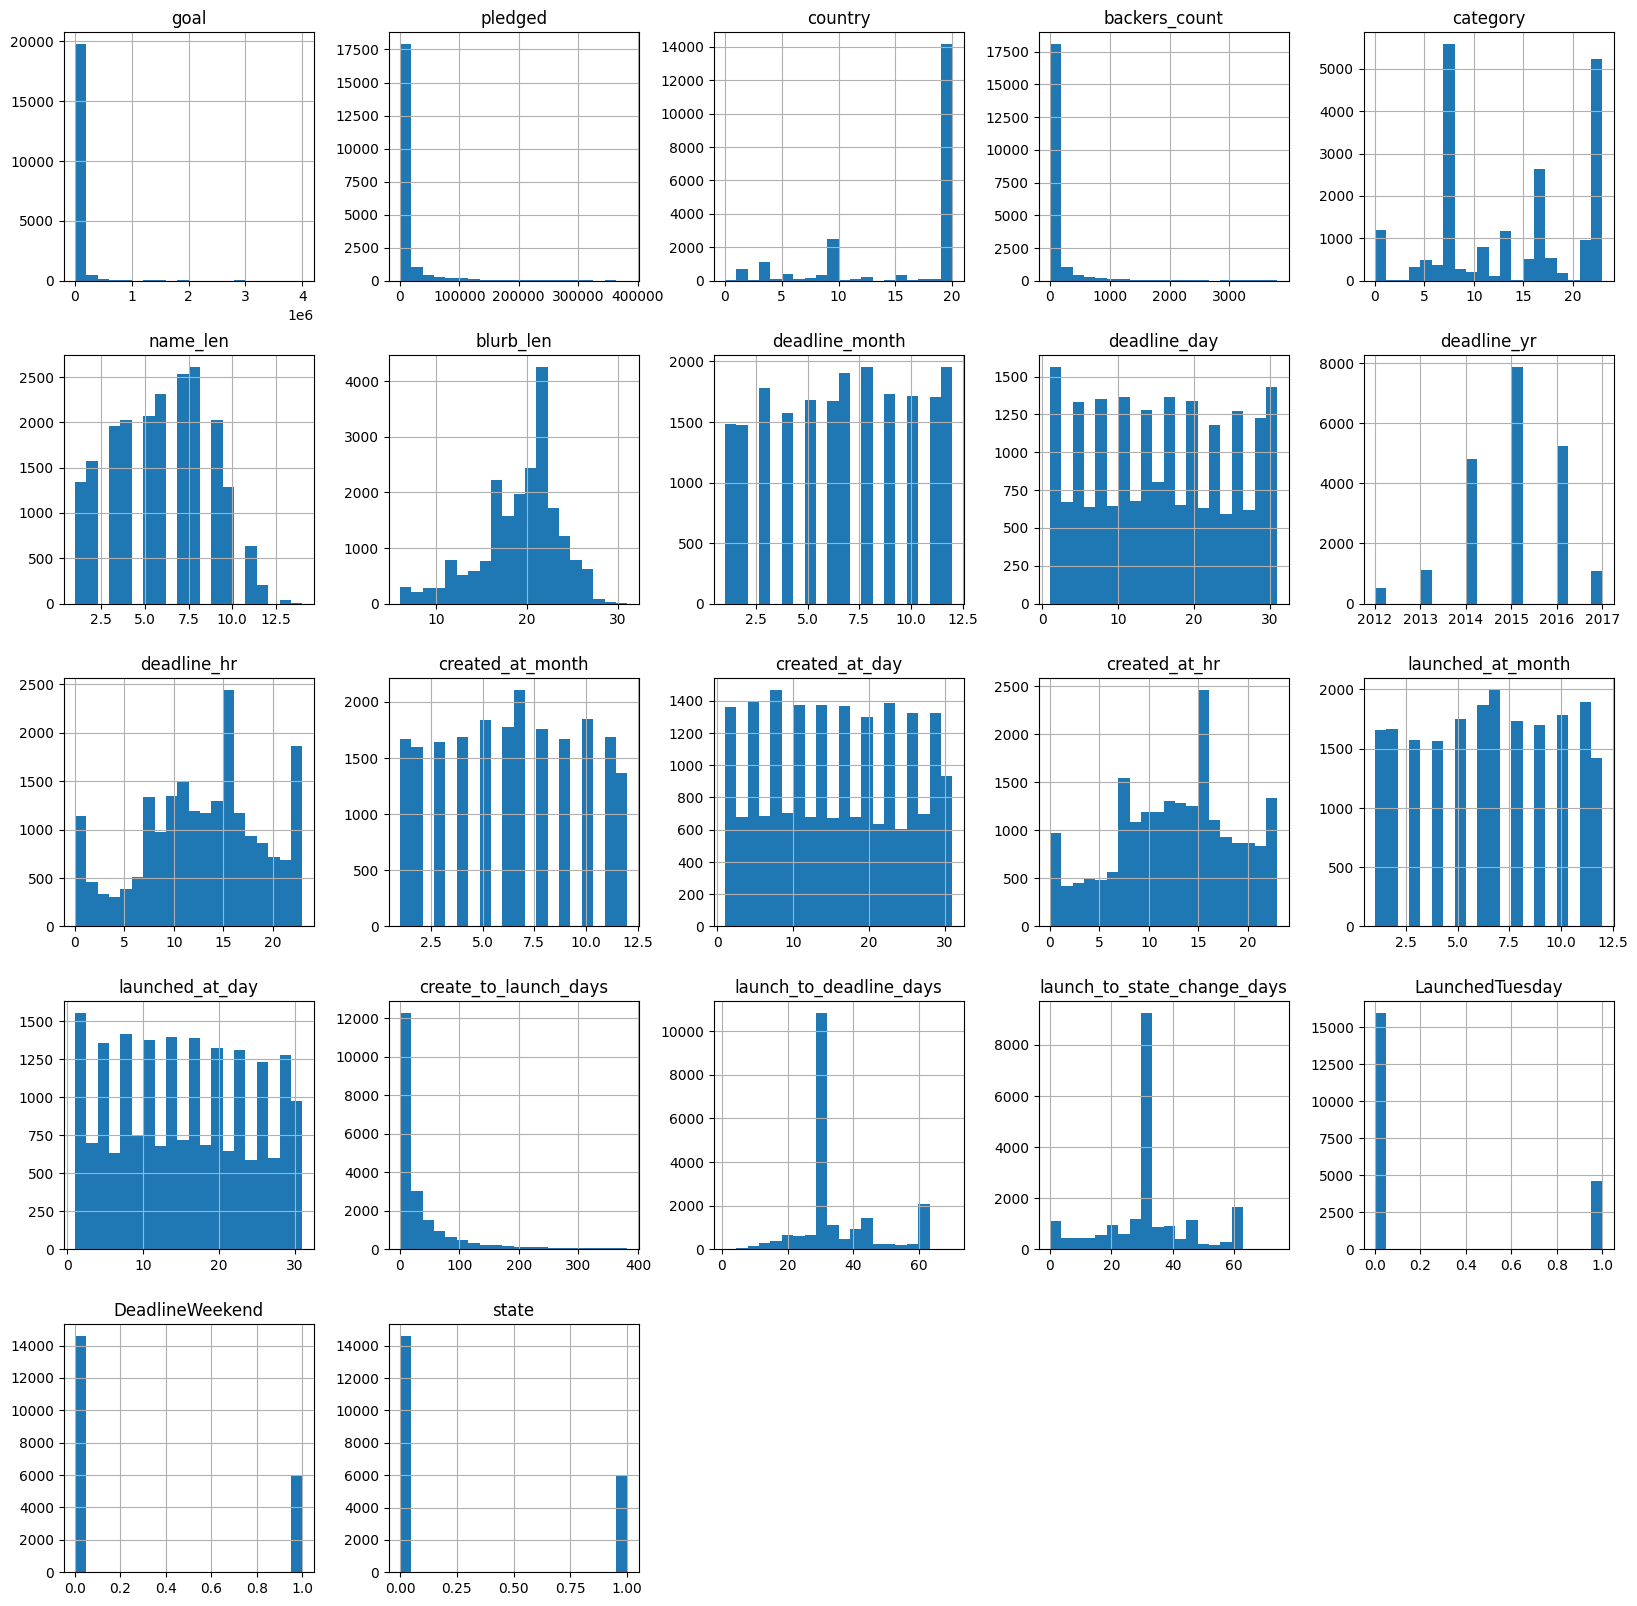

In [35]:
data.hist(bins=20,figsize=(20,20))
plt.show()

# Handling Imbalance Using Upsampling & Downsampling

In [36]:
# UNDER SAMPLING
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

In [37]:
X_under.shape,y_under.shape

((12036, 24), (12036, 1))

In [38]:
y_under=pd.DataFrame(y_under,columns=["state"])

In [39]:
data_under = pd.concat([X_under, y_under], axis=1)

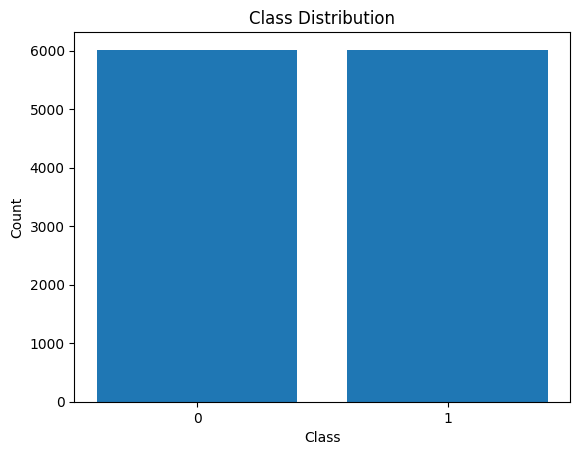

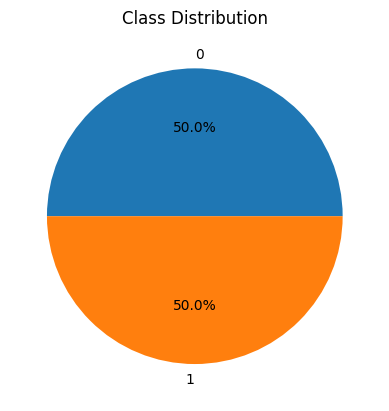

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of instances for each class
class_counts = y_under["state"].value_counts()

# Plot the class distribution using a bar plot
fig, ax = plt.subplots()
ax.bar(class_counts.index.astype(str), class_counts.values)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Distribution")
plt.show()

# Plot the class distribution using a pie chart
fig, ax = plt.subplots()
ax.pie(class_counts.values, labels=class_counts.index, autopct="%1.1f%%")
ax.set_title("Class Distribution")
plt.show()

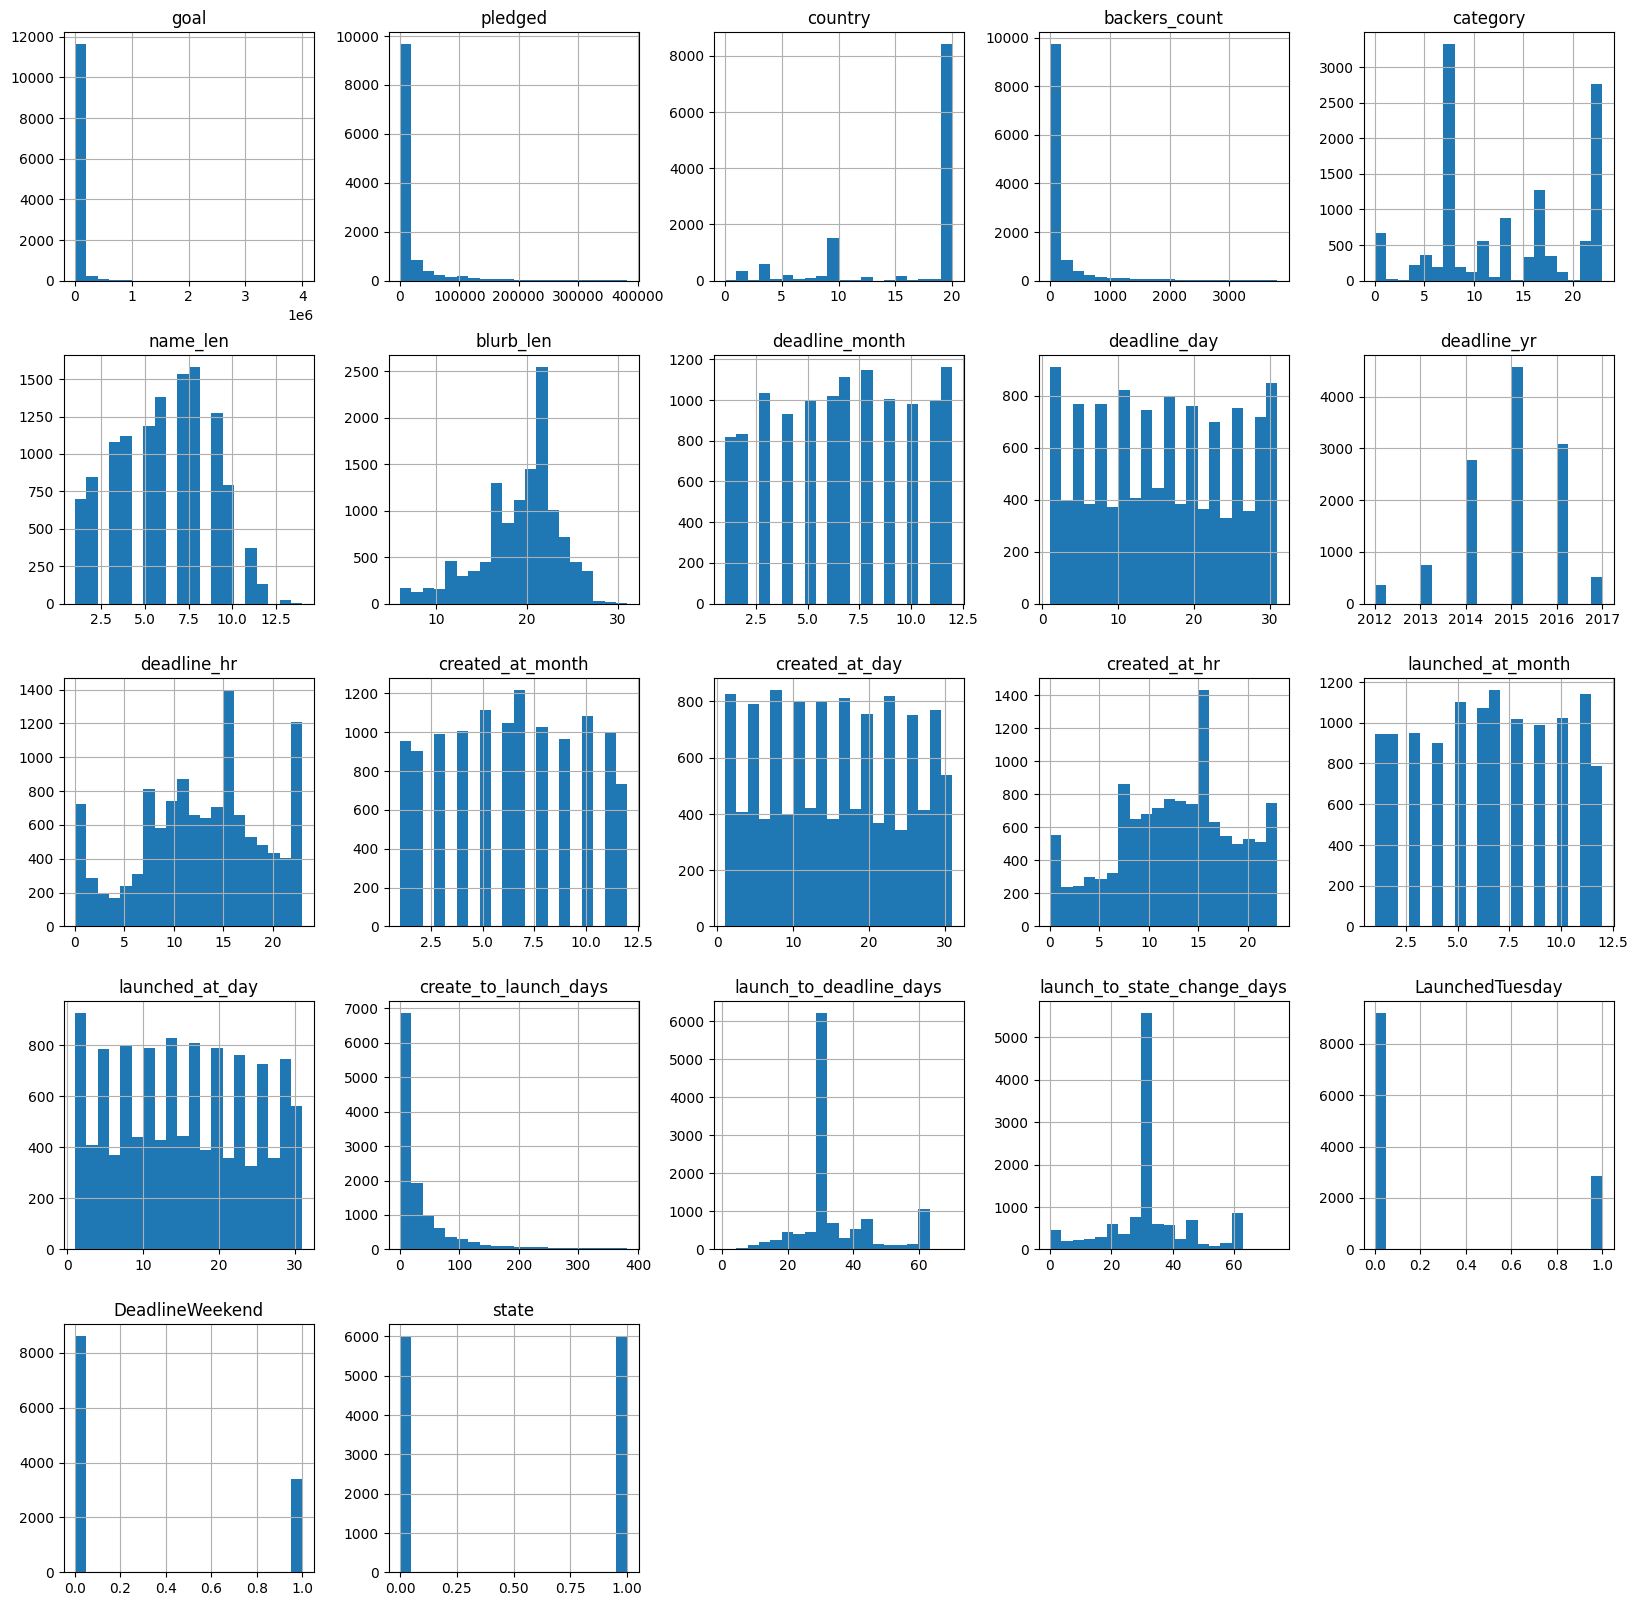

In [41]:
data_under.hist(bins=20,figsize=(20,20))
plt.show()

In [42]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_over.shape, y_over.shape

((29228, 24), (29228, 1))

In [43]:
y_over=pd.DataFrame(y_over,columns=["state"])

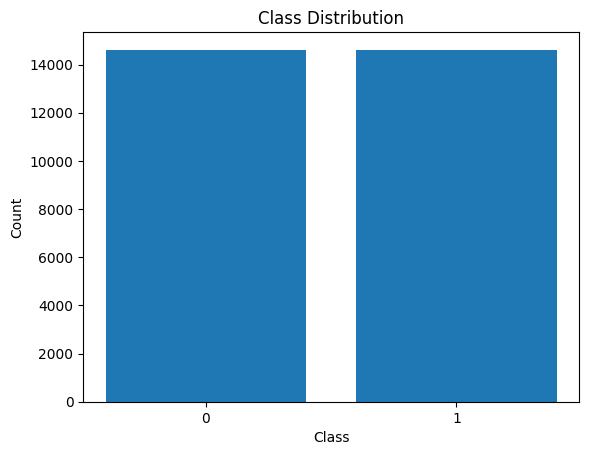

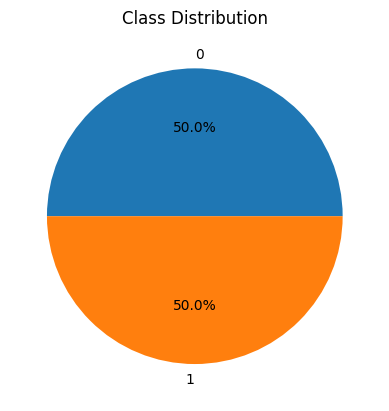

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of instances for each class
class_counts = y_over["state"].value_counts()

# Plot the class distribution using a bar plot
fig, ax = plt.subplots()
ax.bar(class_counts.index.astype(str), class_counts.values)
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Distribution")
plt.show()

# Plot the class distribution using a pie chart
fig, ax = plt.subplots()
ax.pie(class_counts.values, labels=class_counts.index, autopct="%1.1f%%")
ax.set_title("Class Distribution")
plt.show()

In [45]:
X_over_final=pd.concat([X_over, y_over], axis=1)

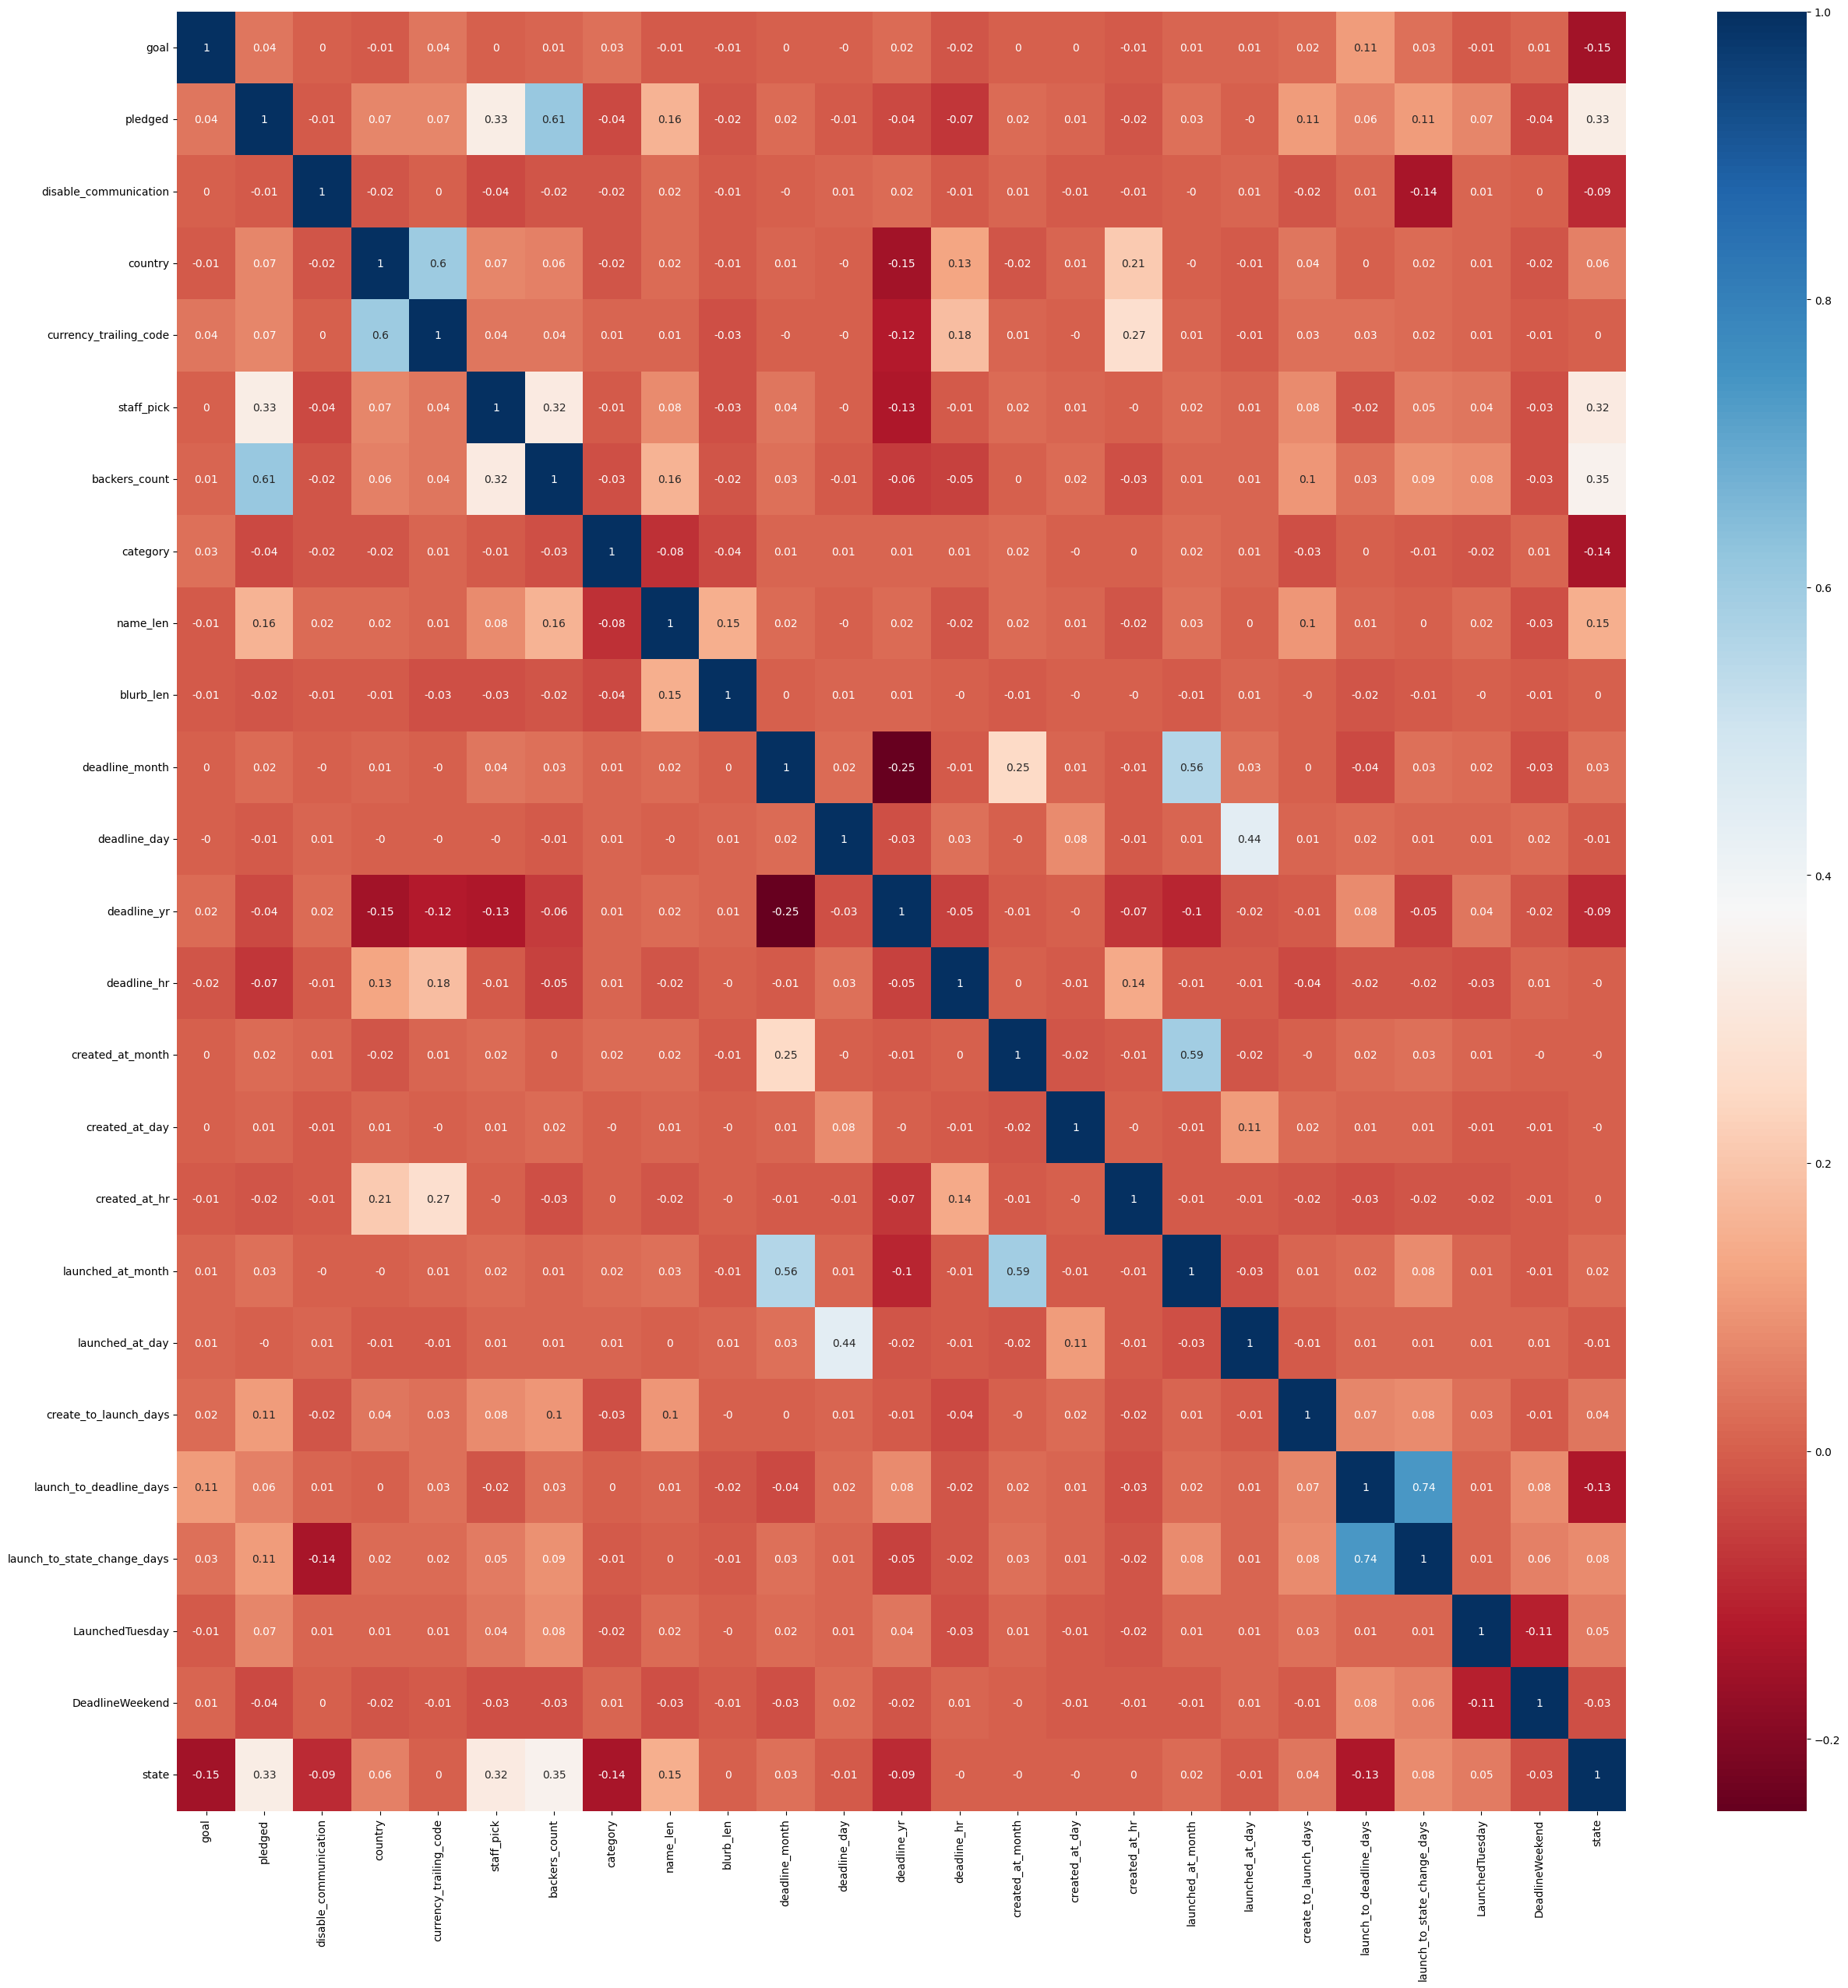

In [46]:
# calculate the correlation matrix
corr_matrix = X_over_final.corr().round(2)

# create the heatmap
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', ax=ax)

# show the plot
plt.show()

In [47]:
data_over = pd.concat([X_over, y_over], axis=1)

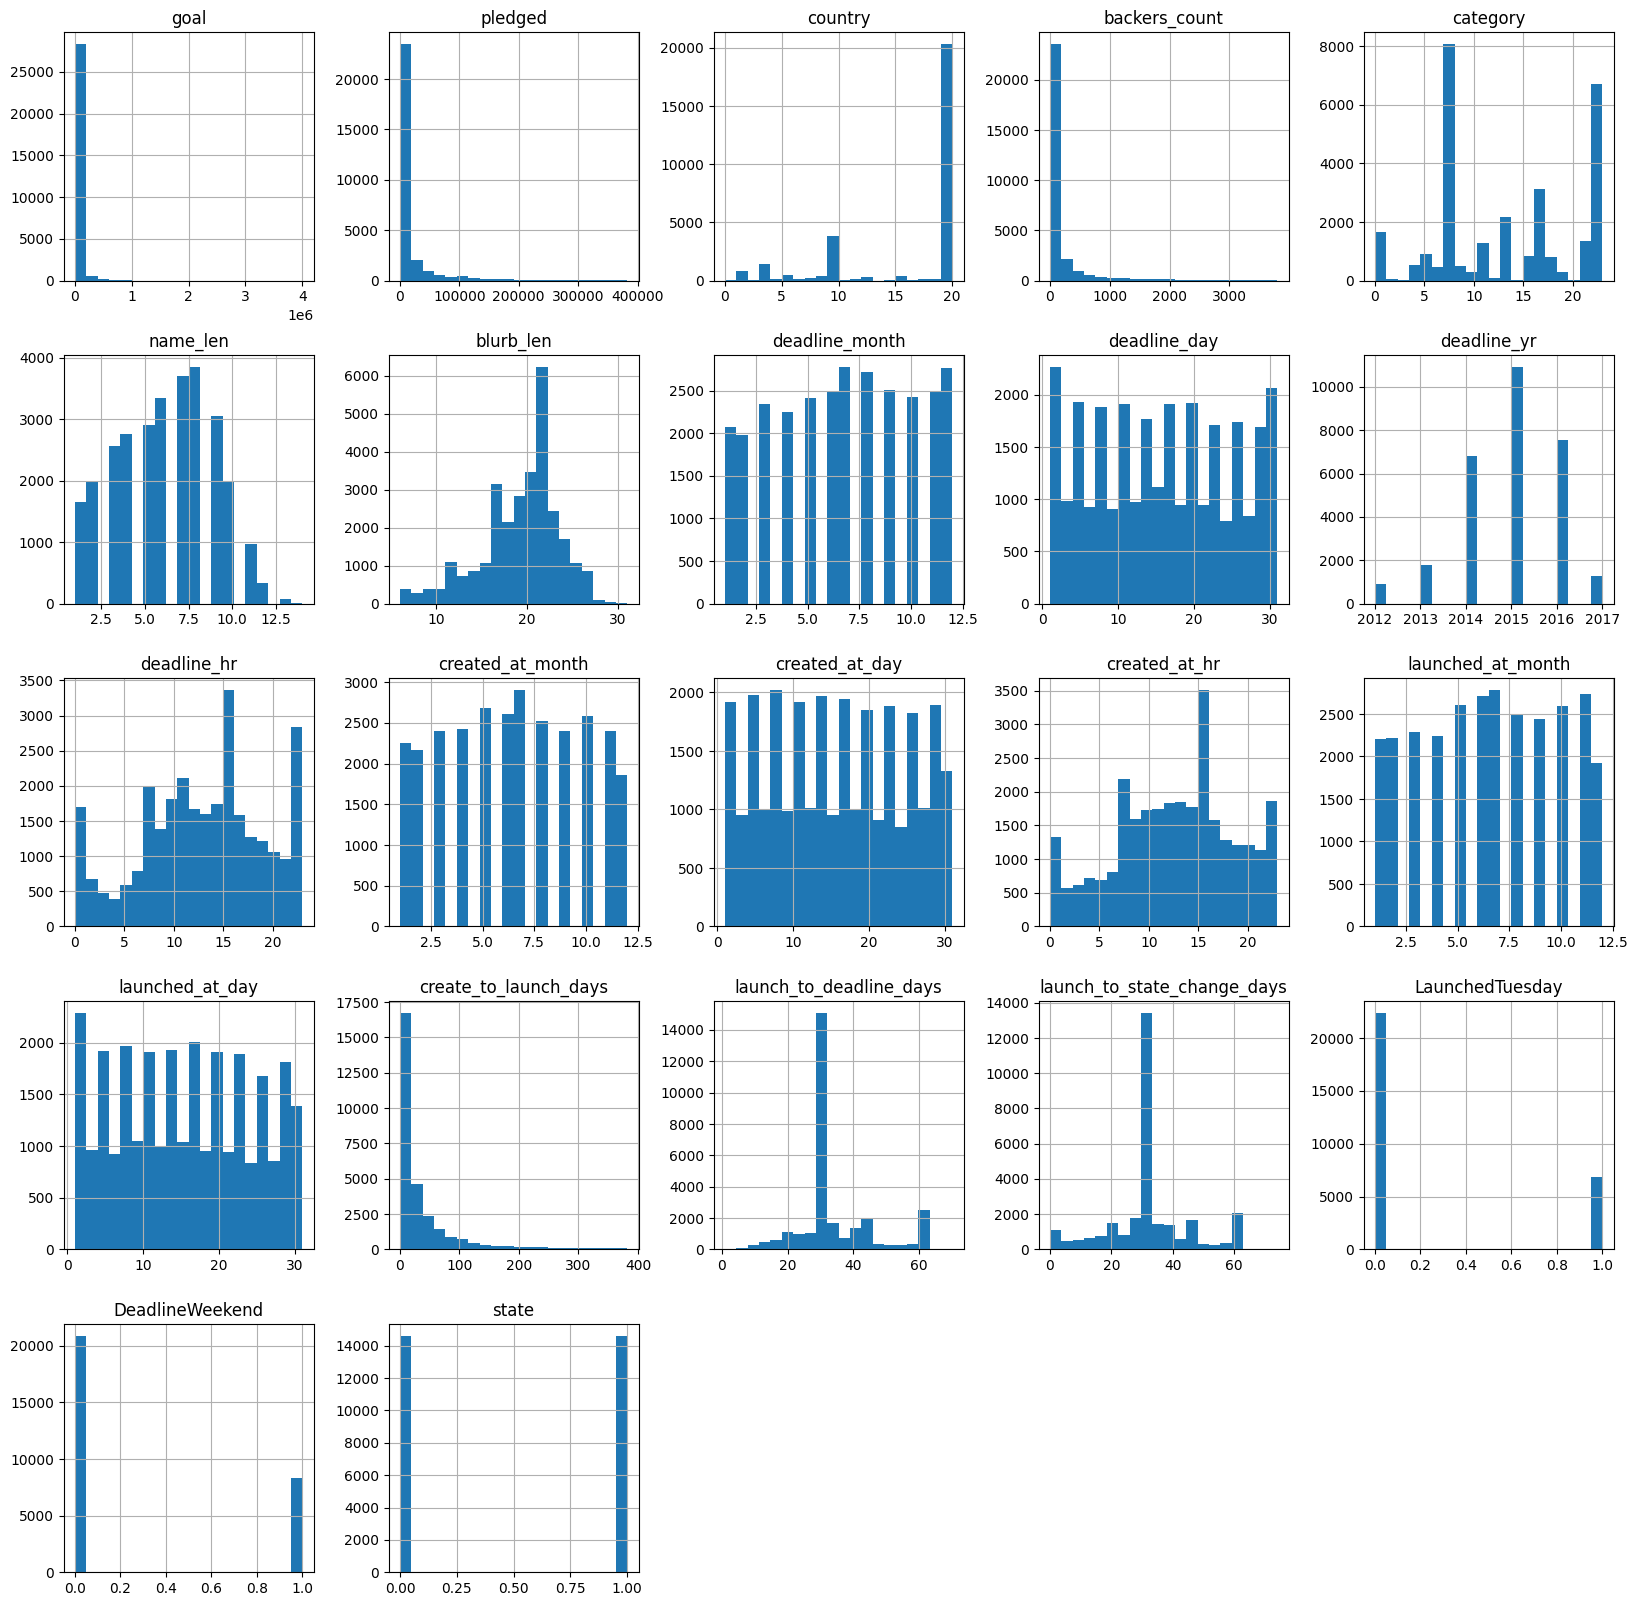

In [48]:
data_over.hist(bins=20,figsize=(20,20))
plt.show()

# Scaling of over sampled data

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_over_scaled= scaler.fit_transform(X_over)
y_over_scaled=scaler.fit_transform(y_over)

In [50]:
X_over_scaled=pd.DataFrame(X_over_scaled,columns=X_cols)

y_over_scaled=pd.DataFrame(y_over_scaled,columns=y_cols)

In [51]:
X_scaled_over_final=pd.concat([X_over_scaled, y_over_scaled], axis=1)

In [52]:
X_scaled_over_final.describe()

,goal,pledged,disable_communication,country,currency_trailing_code,staff_pick,backers_count,category,name_len,blurb_len,...,created_at_day,created_at_hr,launched_at_month,launched_at_day,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,LaunchedTuesday,DeadlineWeekend,state
count,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,...,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,2.922800e+04,29228.000000
mean,2.722759e-17,5.445517e-17,-2.333793e-17,-1.312759e-16,1.259276e-16,5.445517e-17,-6.223448e-17,-5.056552e-17,3.500690e-17,-4.341827e-16,...,3.695172e-17,3.695172e-17,5.348276e-17,7.463276e-17,-5.834483e-17,-7.779310e-18,-7.779310e-17,1.361379e-17,3.403448e-17,0.000000
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017
min,-2.819720e-01,-4.065119e-01,-8.905943e-02,-2.609990e+00,-1.969636e+00,-4.247407e-01,-4.092925e-01,-1.953948e+00,-1.831732e+00,-3.083850e+00,...,-1.658025e+00,-2.145032e+00,-1.668041e+00,-1.622774e+00,-6.291132e-01,-2.925033e+00,-2.404717e+00,-5.523701e-01,-6.318270e-01,-1.000000
25%,-2.626169e-01,-4.039479e-01,-8.905943e-02,-1.158163e+00,5.077080e-01,-4.247407e-01,-4.003314e-01,-7.714670e-01,-7.591922e-01,-5.107027e-01,...,-8.599604e-01,-6.194288e-01,-7.708087e-01,-8.286838e-01,-5.618731e-01,-3.534509e-01,-1.912761e-01,-5.523701e-01,-6.318270e-01,-1.000000
50%,-2.174400e-01,-3.649649e-01,-8.905943e-02,6.162917e-01,5.077080e-01,-4.247407e-01,-3.488049e-01,-3.241628e-02,-4.416568e-02,1.910648e-01,...,-6.189605e-02,5.861680e-02,1.264233e-01,-3.459366e-02,-3.937728e-01,-3.534509e-01,-1.149505e-01,-5.523701e-01,-6.318270e-01,0.000000
75%,-5.609378e-02,-1.574543e-01,-8.905943e-02,6.162917e-01,5.077080e-01,-4.247407e-01,-1.404589e-01,1.150065e+00,6.708608e-01,6.589099e-01,...,8.501775e-01,7.366624e-01,7.245780e-01,8.729379e-01,7.690814e-02,3.559509e-01,2.666772e-01,-5.523701e-01,1.582712e+00,1.000000
max,2.553341e+01,7.769516e+00,1.122846e+01,6.162917e-01,5.077080e-01,2.354378e+00,8.106011e+00,1.445685e+00,2.815940e+00,2.764213e+00,...,1.762251e+00,1.753731e+00,1.621810e+00,1.780470e+00,5.792319e+00,3.193558e+00,3.243373e+00,1.810380e+00,1.582712e+00,1.000000


### Scaling of Under sampled data

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_under_scaled= scaler.fit_transform(X_under)
y_under_scaled=scaler.fit_transform(y_under)

In [54]:
X_under_scaled=pd.DataFrame(X_under_scaled,columns=X_cols)
y_under_scaled=pd.DataFrame(y_under_scaled,columns=y_cols)

In [55]:
X_scaled_under_final=pd.concat([X_under_scaled, y_under_scaled], axis=1)

In [56]:
X_scaled_under_final.describe()

,goal,pledged,disable_communication,country,currency_trailing_code,staff_pick,backers_count,category,name_len,blurb_len,...,created_at_day,created_at_hr,launched_at_month,launched_at_day,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,LaunchedTuesday,DeadlineWeekend,state
count,12036.000000,12036.000000,1.203600e+04,1.203600e+04,1.203600e+04,1.203600e+04,12036.000000,1.203600e+04,1.203600e+04,1.203600e+04,...,1.203600e+04,1.203600e+04,1.203600e+04,1.203600e+04,12036.000000,1.203600e+04,1.203600e+04,1.203600e+04,1.203600e+04,12036.000000
mean,0.000000,0.000000,1.889113e-17,-2.361392e-17,9.917845e-17,-3.778227e-17,0.000000,-1.133468e-16,5.667340e-17,2.479461e-16,...,-3.778227e-17,1.371083e-16,-7.556453e-17,8.235353e-17,0.000000,-1.700202e-16,-4.722783e-17,1.180696e-16,-3.778227e-17,0.000000
std,1.000042,1.000042,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042,1.000042e+00,1.000042e+00,1.000042e+00,...,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042
min,-0.279976,-0.405227,-9.013675e-02,-2.617631e+00,-1.994925e+00,-4.267154e-01,-0.408609,-1.962590e+00,-1.819593e+00,-3.058751e+00,...,-1.655706e+00,-2.149069e+00,-1.646370e+00,-1.626585e+00,-0.629792,-2.917146e+00,-2.419214e+00,-5.554686e-01,-6.295139e-01,-1.000000
25%,-0.261116,-0.402653,-9.013675e-02,-1.165007e+00,5.012719e-01,-4.267154e-01,-0.399582,-7.779421e-01,-7.455925e-01,-5.022899e-01,...,-8.578216e-01,-6.280847e-01,-7.539045e-01,-8.305450e-01,-0.561968,-3.523989e-01,-1.885533e-01,-5.554686e-01,-6.295139e-01,-1.000000
50%,-0.217093,-0.362354,-9.013675e-02,6.104229e-01,5.012719e-01,-4.267154e-01,-0.347676,-3.753699e-02,-2.959188e-02,1.949267e-01,...,-5.993700e-02,4.790810e-02,1.385610e-01,-3.450526e-02,-0.392407,-3.523989e-01,-1.116340e-01,-5.554686e-01,-6.295139e-01,0.000000
75%,-0.059868,-0.153235,-9.013675e-02,6.104229e-01,5.012719e-01,-4.267154e-01,-0.140051,1.147111e+00,6.864087e-01,6.597378e-01,...,8.519312e-01,7.239009e-01,7.335381e-01,8.752545e-01,0.082363,2.666781e-01,2.729626e-01,-5.554686e-01,1.588527e+00,1.000000
max,24.875974,7.803910,1.109425e+01,6.104229e-01,5.012719e-01,2.343482e+00,8.169466,1.443273e+00,2.834410e+00,2.751388e+00,...,1.763799e+00,1.737890e+00,1.626004e+00,1.785014e+00,5.847426,3.185184e+00,3.272816e+00,1.800282e+00,1.588527e+00,1.000000


In [57]:
X_scaled_over_final.head()

,goal,pledged,disable_communication,country,currency_trailing_code,staff_pick,backers_count,category,name_len,blurb_len,...,created_at_day,created_at_hr,launched_at_month,launched_at_day,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,LaunchedTuesday,DeadlineWeekend,state
0,-0.272298,-0.406512,-0.089059,0.616292,0.507708,-0.424741,-0.409292,-1.953948,1.743401,0.424987,...,1.534233,1.584219,1.621810,0.192289,-0.343343,0.178600,0.343003,-0.55237,-0.631827,-1.0
1,-0.278752,-0.406512,-0.089059,0.616292,0.507708,-0.424741,-0.409292,-1.953948,-0.759192,0.892832,...,0.508150,-0.619429,-1.069886,-1.509332,-0.461013,2.306806,2.174816,-0.55237,-0.631827,-1.0
2,0.363406,-0.403948,-0.089059,0.616292,0.507708,-0.424741,-0.398091,-1.953948,0.670861,-0.276780,...,0.964187,-2.145032,-1.668041,1.099821,-0.612303,2.306806,2.174816,-0.55237,-0.631827,-1.0
3,-0.249709,-0.406512,-0.089059,0.616292,0.507708,-0.424741,-0.409292,-1.953948,0.313348,0.424987,...,-1.201988,1.584219,0.724578,-1.055567,-0.629113,-0.353451,-0.114951,-0.55237,-0.631827,-1.0
4,-0.261184,-0.398905,-0.089059,-1.803419,-1.969636,-0.424741,-0.371208,-1.953948,0.313348,-0.276780,...,1.078196,0.228128,-0.471731,1.213262,-0.629113,-0.176100,0.037701,-0.55237,-0.631827,-1.0


# Scaling of Unbalanced data

In [58]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
# y_scaled=scaler.fit_transform(y)

In [59]:
X_scaled=pd.DataFrame(X_scaled,columns=X_cols)
#y_scaled=pd.DataFrame(y_scaled,columns=y_cols)

In [60]:
X_imbalance=pd.concat([X_scaled, y['state']], axis=1)
X_imbalance.head()

,goal,pledged,disable_communication,country,currency_trailing_code,staff_pick,backers_count,category,name_len,blurb_len,...,created_at_day,created_at_hr,launched_at_month,launched_at_day,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,LaunchedTuesday,DeadlineWeekend,state
0,-0.285939,-0.331494,-0.106176,0.626138,0.506323,-0.344162,-0.331580,-1.987639,1.794752,0.421628,...,1.533348,1.568328,1.614941,0.190626,-0.325041,0.123858,0.353621,-0.539026,-0.642241,0
1,-0.291461,-0.331494,-0.106176,0.626138,0.506323,-0.344162,-0.331580,-1.987639,-0.686980,0.884084,...,0.507876,-0.617699,-1.047941,-1.513792,-0.442676,2.198291,2.064599,-0.539026,-0.642241,0
2,0.258054,-0.328288,-0.106176,0.626138,0.506323,-0.344162,-0.317423,-1.987639,0.731152,-0.272055,...,0.963642,-2.131103,-1.639693,1.099649,-0.593921,2.198291,2.064599,-0.539026,-0.642241,0
3,-0.266609,-0.331494,-0.106176,0.626138,0.506323,-0.344162,-0.331580,-1.987639,0.376619,0.421628,...,-1.201244,1.568328,0.727313,-1.059280,-0.610726,-0.394750,-0.074124,-0.539026,-0.642241,0
4,-0.276428,-0.321985,-0.106176,-1.745384,-1.975022,-0.344162,-0.283447,-1.987639,0.376619,-0.272055,...,1.077583,0.223080,-0.456190,1.213277,-0.610726,-0.221881,0.068457,-0.539026,-0.642241,0


In [61]:
X_imbalance.shape

(20632, 25)

## **Principal Component Analysis**

# PCA of oversampled data

In [62]:
from sklearn.decomposition import PCA
pca = PCA(0.95) 
data_pca = pca.fit_transform(X_scaled_over_final)

In [63]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+ str(x) for x in range(1,len(per_var)+1)]

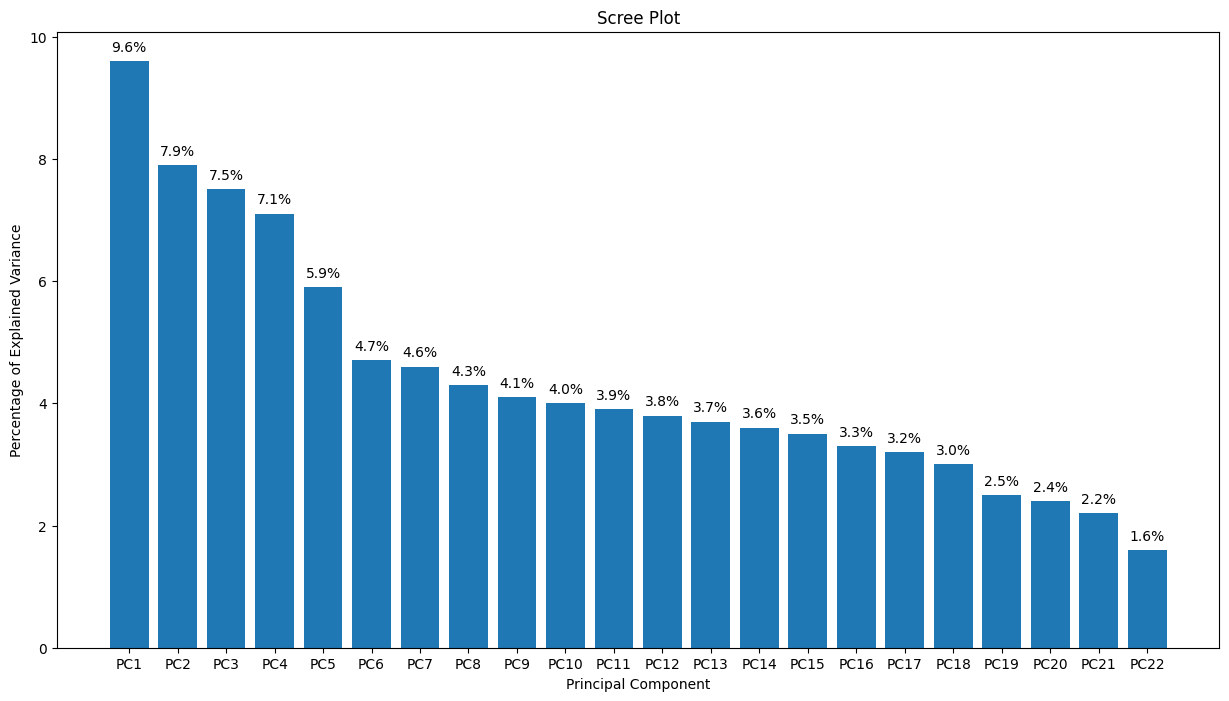

In [64]:
import matplotlib.pyplot as plt

# Plotting Scree plot to show the % distribution of data in the top 3 Principal Components
fig = plt.figure(figsize=(15, 8))
bar_plot = plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

# Add text labels to the bars
plt.bar_label(bar_plot, labels=[f'{p:.1f}%' for p in per_var], padding=5)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel("Principal Component")
plt.title('Scree Plot')
plt.show()


In [65]:
# from sklearn.manifold import TSNE
# pca = PCA(0.98)
# data_set_pca = pca.fit_transform(X_scaled)
# data_set_pca
# tsne = TSNE()
# data_set_pca_tsne = tsne.fit_transform(data_set_pca)
# plt.figure(figsize=(20,10))
# sns.scatterplot(x=data_set_pca_tsne[:,0],y=data_set_pca_tsne[:,1],hue=y['state'], palette=sns.color_palette("hls", 2))

# PCA of Unbalanced data

In [66]:
from sklearn.decomposition import PCA
pca = PCA(0.98) 
data_pca = pca.fit_transform(X_scaled)

In [67]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+ str(x) for x in range(1,len(per_var)+1)]

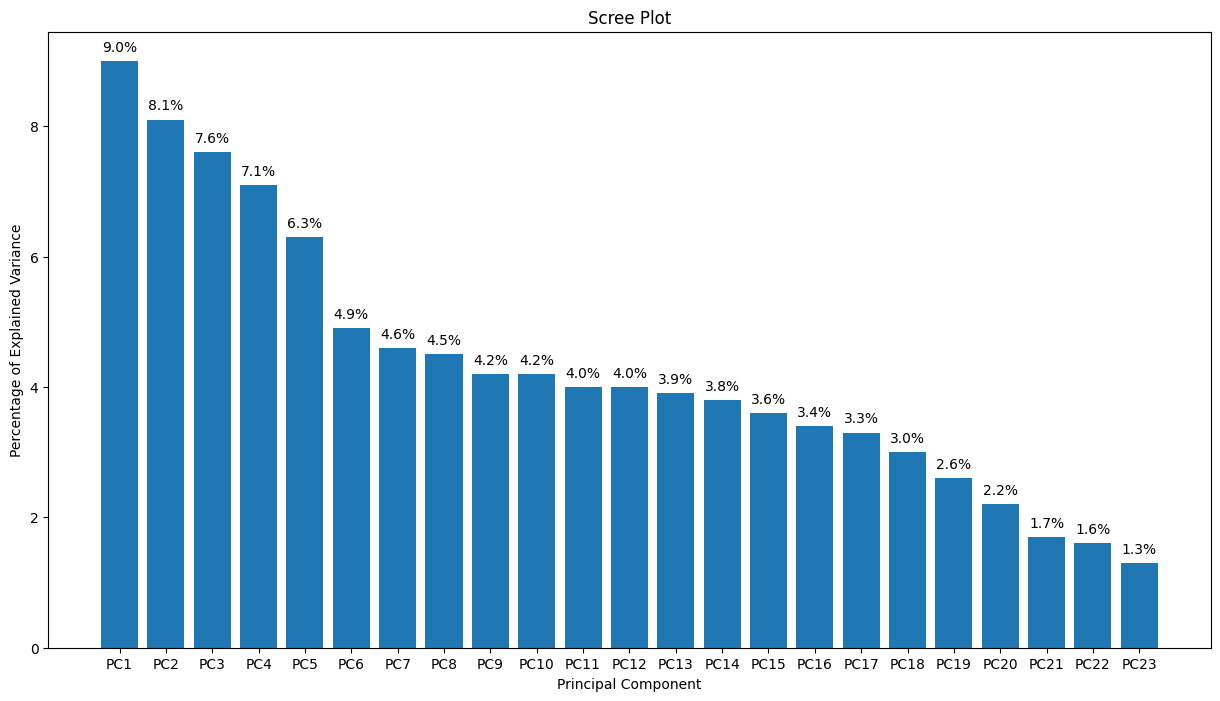

In [68]:
import matplotlib.pyplot as plt

# Plotting Scree plot to show the % distribution of data in the top 3 Principal Components
fig = plt.figure(figsize=(15, 8))
bar_plot = plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

# Add text labels to the bars
plt.bar_label(bar_plot, labels=[f'{p:.1f}%' for p in per_var], padding=5)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel("Principal Component")
plt.title('Scree Plot')
plt.show()

# MODELS

# Logistic Regression

Applying logistic model on imbalanced data

In [69]:
models_im=[]
models_up=[]
models_down=[]
models_im1=[]

In [70]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# X= X_imbalance.drop(["state"],axis=1)
# y=X_imbalance["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_im = LogisticRegression(max_iter=1000, solver='saga')

# Fit the model to the training data
logreg_im.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_im.predict(X_test)

# Evaluate the model performance using accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions on the training data
y_pred = logreg_im.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("train Accuracy:", accuracy)

models_im.append(logreg_im)

Accuracy: 0.8807850739035619
train Accuracy: 0.8807850739035619


In [71]:
models_im1.append(("Log_reg", logreg_im))

Logistic Reg on Under Sampled

In [72]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the dataset into X (features) and y (target)
X = X_scaled_under_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_under_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='saga')

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model performance using accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions on the training data
y_pred = logreg.predict(X_train)

# Evaluate the model performance using accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print("train Accuracy:", accuracy)

Accuracy: 0.8874584717607974
train Accuracy: 0.8800373909430826


Applying logistic model on up balanced data

In [73]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the dataset into X (features) and y (target)
X = X_scaled_over_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_over_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_b_u = LogisticRegression(max_iter=1000, solver='saga')


# Fit the model to the training data
logreg_b_u.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_b_u.predict(X_test)

# Evaluate the model performance using accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions on the training data
y_pred = logreg_b_u.predict(X_train)

# Evaluate the model performance using accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
print("train Accuracy:", accuracy)


models_up.append(("Log_reg", logreg_b_u))


Accuracy: 0.8963393773520356
train Accuracy: 0.8920964844752374


In [74]:
X_scaled.shape

(20632, 24)

RFE with Logistic Regression on Unbalanced scaled data

In [75]:
from sklearn.feature_selection import RFE
# Determiniation of dominant features , Method one Recursive Model Elimination, 
# very similar idea to foreward selection but done recurssively. This method is gready
# which means it tries one feature at the time
NUM_FEATURES = 3 # this is kind of arbitrary but you should get an idea by observing the scatter plots and correlation.
model = LogisticRegression(multi_class='ovr')
#rfe = RFE(model, NUM_FEATURES)
rfe = RFE(model, n_features_to_select = NUM_FEATURES)

X=X_imbalance.drop(['state'],axis=1)
y=X_imbalance['state']

fit = rfe.fit(X,y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
# calculate the score for the selected features
score = rfe.score(X,y)
print("Model Score with selected features is: ", score)

Num Features: 3
Selected Features: [ True False False False False False False False False False False False
 False False False False False False False False  True  True False False]
Feature Ranking: [ 1  4  3  8  9  5  2  6  7 21 13 17 11 15 16 19 14 12 20 10  1  1 18 22]
Model Score with selected features is:  0.7076870880186119


In [76]:
from sklearn.feature_selection import RFE
# Determiniation of dominant features , Method one Recursive Model Elimination, 
# very similar idea to foreward selection but done recurssively. This method is gready
# which means it tries one feature at the time
NUM_FEATURES = 4 # this is kind of arbitrary but you should get an idea by observing the scatter plots and correlation.
model = LogisticRegression(multi_class='ovr')
#rfe = RFE(model, NUM_FEATURES)
rfe = RFE(model, n_features_to_select = NUM_FEATURES)
fit = rfe.fit(X, y)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)
# calculate the score for the selected features
score = rfe.score(X,y)
print("Model Score with selected features is: ", score)

Num Features: 4
Selected Features: [ True False False False False False  True False False False False False
 False False False False False False False False  True  True False False]
Feature Ranking: [ 1  3  2  7  8  4  1  5  6 20 12 16 10 14 15 18 13 11 19  9  1  1 17 21]
Model Score with selected features is:  0.8460643660333462


# Decision tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the decision tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': [3, 5, 10, 20, None], 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform a grid search over the hyperparameters
clf_im = GridSearchCV(dt, parameters, cv=5)
clf_im.fit(X_train, y_train)

# Print the best parameters found
print('Best parameters found:')
print(clf_im.best_params_)

# Make predictions on the test set
y_pred = clf_im.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# Visualize the decision tree
dot_data = export_graphviz(clf_im.best_estimator_, 
                           out_file=None, 
                           feature_names=X_train.columns, 
                           class_names = np.unique(y_train.values.astype(str)),
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')
graph

models_im.append(clf_im)

Best parameters found:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9852192876181245


In [78]:
models_im1.append(("Decision tree", clf_im))

On Under sampled

Best parameters found:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.9858803986710963


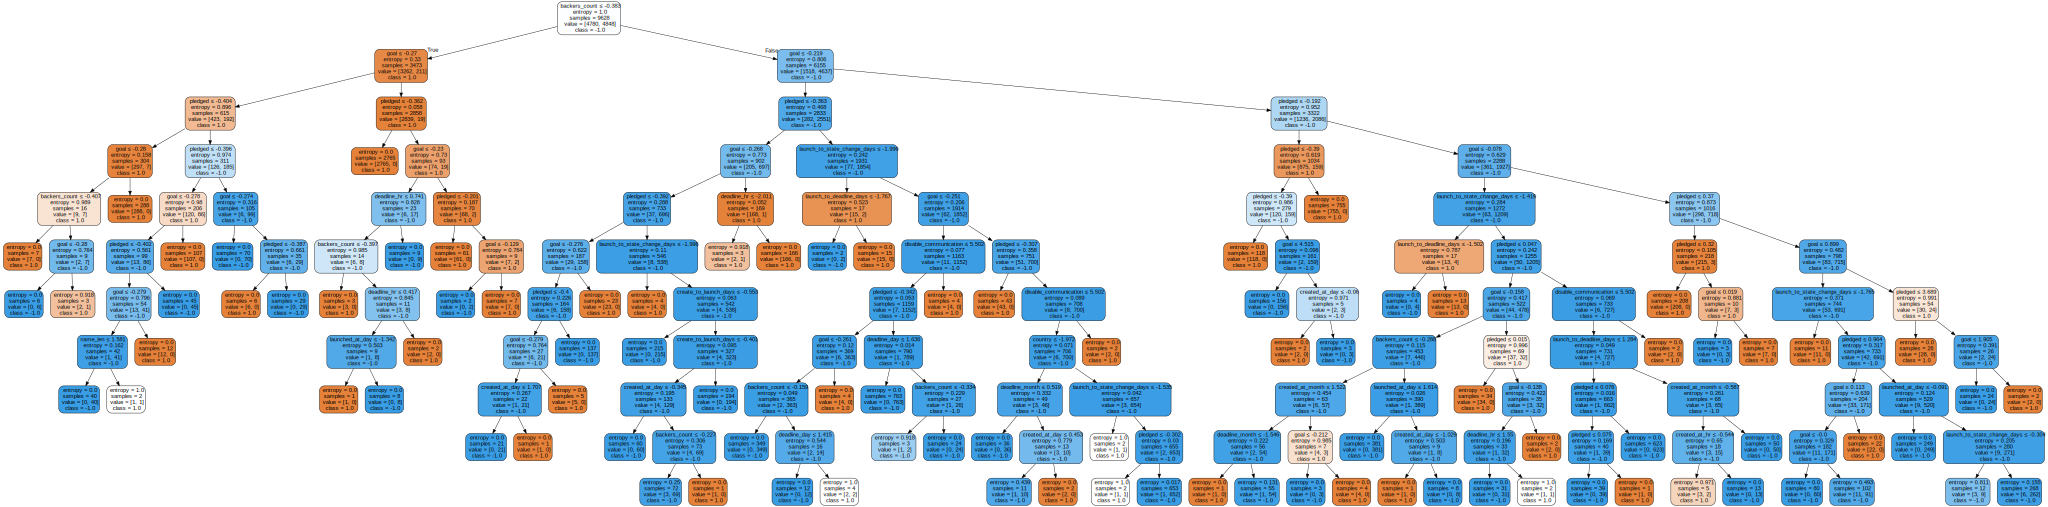

In [79]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Split the dataset into X (features) and y (target)
X = X_scaled_under_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_under_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the decision tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': [3, 5, 10, 20, None], 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform a grid search over the hyperparameters
clf = GridSearchCV(dt, parameters, cv=5)
clf.fit(X_train, y_train)

# Print the best parameters found
print('Best parameters found:')
print(clf.best_params_)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Visualize the decision tree
dot_data = export_graphviz(clf.best_estimator_, 
                           out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=y_train.unique().astype(str),
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')
graph



On Up sampled data

In [80]:
# Define the decision tree classifier
dt = DecisionTreeClassifier()


# Split the dataset into X (features) and y (target)
X = X_scaled_over_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_over_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': [3, 5, 10, 20, None], 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform a grid search over the hyperparameters
clf_d_up = GridSearchCV(dt, parameters, cv=5)
clf_d_up.fit(X_train, y_train)

# Print the best parameters found
print('Best parameters found:')
print(clf_d_up.best_params_)

# Make predictions on the test set
y_pred = clf_d_up.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Visualize the decision tree
dot_data = export_graphviz(clf_d_up.best_estimator_, 
                           out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=y_train.unique().astype(str),
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')
graph

models_up.append(("Decision tree", clf_d_up))

Best parameters found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9950393431406089


# Random Forest

On unbalanced

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X=X_imbalance.drop(['state'],axis=1)
y=X_imbalance['state']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rfc_im = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc_im, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

models_im.append(rfc_im)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9735231747955165
Accuracy: 0.9769808577659317


In [82]:
models_im1.append(("RF", rfc_im))

On up sampled

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Split the dataset into X (features) and y (target)
X = X_scaled_over_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_over_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the model
rfc = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


models_up.append(("Random forest", grid_search))

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.9807116363808625
Accuracy: 0.9823811152925077


On down sampled

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Split the dataset into X (features) and y (target)
X = X_scaled_under_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_under_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rfc = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score:  0.965101482110828
Accuracy: 0.965531561461794


# Support Vector Machine

On unbalanced

In [85]:
# Import necessary libraries
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X=X_imbalance.drop(['state'],axis=1)
y=X_imbalance['state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Set the parameters for GridSearchCV
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']}

# Initialize the SVM classifier
svc = svm.SVC()

# Set up GridSearchCV with 5-fold cross-validation
clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
clf.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

# Make predictions on the testing set using the best estimator found by GridSearchCV
y_pred = clf.best_estimator_.predict(X_test)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy score: ", clf.best_estimator_.score(X_test, y_test))


Best parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.8813181913629787
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4397
           1       0.86      0.75      0.80      1793

    accuracy                           0.89      6190
   macro avg       0.88      0.85      0.86      6190
weighted avg       0.89      0.89      0.89      6190

Accuracy score:  0.892730210016155


In [86]:
models_im1.append(("SVM", svc))

On Up sampled 

In [87]:
# Import necessary libraries
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into X (features) and y (target)
X = X_scaled_over_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_over_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the parameters for GridSearchCV
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']}

# Initialize the SVM classifier
svc = svm.SVC()

# Set up GridSearchCV with 5-fold cross-validation
clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
clf.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

# Make predictions on the testing set using the best estimator found by GridSearchCV
y_pred = clf.best_estimator_.predict(X_test)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy score: ", clf.best_estimator_.score(X_test, y_test))

models_up.append(("SVM", svc))

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.9187836093596735
              precision    recall  f1-score   support

        -1.0       0.95      0.90      0.92      2909
         1.0       0.90      0.95      0.93      2937

    accuracy                           0.92      5846
   macro avg       0.93      0.92      0.92      5846
weighted avg       0.93      0.92      0.92      5846

Accuracy score:  0.9247348614437222


On down sampled

In [88]:
# Import necessary libraries
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into X (features) and y (target)
X = X_scaled_under_final.drop("state", axis=1)  # Drop the target column from the features
y = X_scaled_under_final["state"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the parameters for GridSearchCV
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']}

# Initialize the SVM classifier
svc = svm.SVC()

# Set up GridSearchCV with 5-fold cross-validation
clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
clf.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

# Make predictions on the testing set using the best estimator found by GridSearchCV
y_pred = clf.best_estimator_.predict(X_test)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy score: ", clf.best_estimator_.score(X_test, y_test))


Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score:  0.8950977869482543
              precision    recall  f1-score   support

        -1.0       0.92      0.89      0.90      1238
         1.0       0.89      0.91      0.90      1170

    accuracy                           0.90      2408
   macro avg       0.90      0.90      0.90      2408
weighted avg       0.90      0.90      0.90      2408

Accuracy score:  0.9028239202657807


In [89]:
# import matplotlib.pyplot as plt

# # Define the models and their corresponding accuracy scores
# models = ['Linear SVC', 'RBF SVC', 'Random Forest(d=2)', 'AdaBoost']

# # Create a bar plot
# plt.bar(models, acc_scores, color='blue')

# # Set the title and labels
# plt.title('Accuracy Scores for Different Models')
# plt.xlabel('Model')
# plt.ylabel('Accuracy')

# # Show the plot
# plt.show()

In [91]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

X=X_imbalance.drop(['state'],axis=1)
y=X_imbalance['state']

for name,model in models_im1:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, " - Accuracy: ", cv_results.mean(), " (", cv_results.std(), ")")

Log_reg  - Accuracy:  0.8753871976537517  ( 0.0055404090775467325 )
Decision tree  - Accuracy:  0.9876402056161154  ( 0.003014429452062157 )
RF  - Accuracy:  0.9746992507336725  ( 0.0033794372662044013 )
SVM  - Accuracy:  0.857938291680288  ( 0.007953236174697651 )


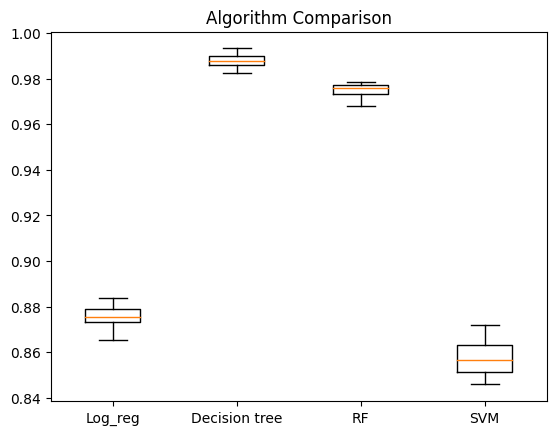

In [92]:
# Compare the results of all models using boxplots
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.show()

In [93]:
from sklearn.model_selection import KFold, cross_val_score

results_up = []
names_up = []

for name,model in models_up:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_over_scaled, y_over_scaled, cv=kfold, scoring='accuracy')
    results_up.append(cv_results)
    names_up.append(name)
    print(name, " - Accuracy: ", cv_results.mean(), " (", cv_results.std(), ")")

Log_reg  - Accuracy:  0.891234252733226  ( 0.005152594898801572 )
Decision tree  - Accuracy:  0.9938757448478552  ( 0.0014389443452886169 )
Random forest  - Accuracy:  0.9841590206118574  ( 0.001867987466605648 )
SVM  - Accuracy:  0.8886681147396456  ( 0.006802838770751357 )


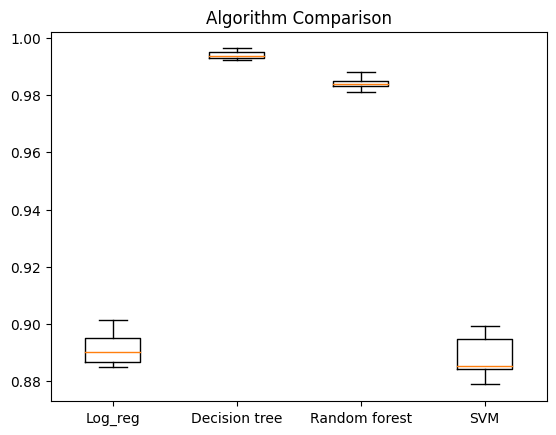

In [94]:
# Compare the results of all models using boxplots
plt.boxplot(results_up, labels=names_up)
plt.title("Algorithm Comparison")
plt.show()